In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
# citi = pd.read_csv(r'citi_bike_local.csv',
#                    parse_dates=['Start Time','Stop Time'],
#                    index_col=0)

citi = pd.read_csv(r'citi_bike_local_julie.csv',
                   parse_dates=['Start Time','Stop Time'],
                   index_col=0)

In [3]:
station_zipcode1 = pd.read_csv(r'station_zipcode.csv',
                   index_col=0,
                              )

In [4]:
station_zipcode1

,station_id,zipcode
0,3760.0,11237
1,3758.0,11237
2,467.0,11213
3,396.0,11216
4,3761.0,11221
...,...,...
882,3163.0,10023-5104
883,537.0,10037
884,4320.0,11101
885,4265.0,11377


In [5]:
zipcode_dict = dict(zip(station_zipcode1.station_id, station_zipcode1.zipcode))

In [34]:
lat = 40.7116453
lng = -73.9513869

In [35]:
citi['start_near'] = (((citi.loc[:,'Start Station Latitude']-lat)**2 + 
     (citi.loc[:,'Start Station Longitude']-lng)**2)**.5<=.005)
citi['start_near'] = (citi['start_near']==True).astype(int)

citi['end_near'] = (((citi.loc[:,'End Station Latitude']-lat)**2 + 
     (citi.loc[:,'End Station Longitude']-lng)**2)**.5<=.005)
citi['end_near'] = (citi['end_near']==True).astype(int)

citi['both_near'] = ((((citi.loc[:,'Start Station Latitude']-lat)**2 + 
                         (citi.loc[:,'Start Station Longitude']-lng)**2)**.5<=.005)
                       &
                       (((citi.loc[:,'End Station Latitude']-lat)**2 + 
                         (citi.loc[:,'End Station Longitude']-lng)**2)**.5<=.005))
citi['both_near'] = (citi['both_near']==True).astype(int)



In [8]:
import geopy

def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    try:
        return location.raw['address']['postcode']
    except KeyError:
        return 'XXXXXXXXX'

def update_zip_code_dict(citi_, id_to_zipcode_={}):
    print('updatezipcode dict')
    current_id_to_zipcode = list(id_to_zipcode_.keys())
    citi_ = citi_[~citi_['End Station ID'].isin(current_id_to_zipcode)]
    citi_zip = citi_.drop_duplicates(subset=['End Station ID'])[['End Station ID',
                                                                    'End Station Latitude',
                                                                    'End Station Longitude']]
    try:
        print('get zipcode')
        geolocator = geopy.Nominatim(user_agent='testing_for_citi_bike')
        citi_zip['zipcodes'] = citi_zip.apply(get_zipcode, axis=1, geolocator=geolocator, 
                                            lat_field='End Station Latitude', 
                                            lon_field='End Station Longitude')
        
        id_to_zipcode_.update(dict(zip(citi_zip['End Station ID'], 
                                      citi_zip['zipcodes'])))
    except ValueError:
        print('No new ZIP codes.')
    return id_to_zipcode_

id_to_zipcode = update_zip_code_dict(citi,zipcode_dict)

updatezipcode dict
get zipcode


In [9]:
id_to_zipcode

{3760.0: '11237',
 3758.0: '11237',
 467.0: '11213',
 396.0: '11216',
 3761.0: '11221',
 3119.0: '11109',
 3058.0: '11221',
 3042.0: '11207',
 168.0: '10011',
 3118.0: '11109',
 366.0: '11205',
 3430.0: '11222',
 3108.0: '11222',
 343.0: '11205',
 3525.0: '11105',
 3047.0: '11233',
 3096.0: '11211',
 3072.0: '11222',
 3759.0: '11237',
 3389.0: '11231',
 3081.0: '11206',
 460.0: '11211',
 3398.0: '11231',
 3078.0: '11207',
 295.0: '10002',
 539.0: '11249',
 242.0: '11238',
 3093.0: '11249',
 3061.0: '11206',
 3776.0: '11221',
 3687.0: '10016',
 3086.0: '11211',
 229.0: '10012',
 3242.0: '11217',
 3756.0: '11206',
 3333.0: '11231',
 3352.0: '11231',
 3429.0: '11217',
 3599.0: '11225',
 3583.0: '11238',
 3454.0: '11222',
 3100.0: '11222',
 3056.0: '11216',
 3074.0: '11206',
 3727.0: '11222',
 369.0: '10011',
 3674.0: '11201',
 3076.0: '11206',
 3346.0: '11217',
 3052.0: '11221',
 3055.0: '11216',
 3414.0: '11213',
 251.0: '10012',
 3263.0: 'XXXXXXXXX',
 241.0: '11221',
 481.0: '11211',
 4

In [10]:
citi["end_zipcode"] = citi["End Station ID"].map(id_to_zipcode)

In [11]:
citi["start_zipcode"] = citi["Start Station ID"].map(id_to_zipcode)

In [33]:
citi.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,Bike ID,User Type,Birth Year,Gender,start_near,end_near,both_near,end_zipcode,start_zipcode,YearMonth
0,236,2016-04-01 00:02:15,2016-04-01 00:06:12,3087.0,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,3086.0,Graham Ave & Conselyea St,40.715143,...,15919,Subscriber,1990.0,1,0,0,0,11211,11211,2016-4
1,764,2016-04-01 00:38:04,2016-04-01 00:50:48,3079.0,Leonard St & Grand St,40.711035,-73.947143,3055.0,Greene Ave & Nostrand Ave,40.688334,...,15202,Subscriber,1985.0,1,0,0,0,11216,11222,2016-4
2,172,2016-04-01 00:55:38,2016-04-01 00:58:30,3087.0,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,3082.0,Hope St & Union Ave,40.711674,...,18680,Subscriber,1972.0,2,0,0,0,11211,11211,2016-4
3,349,2016-04-01 01:05:46,2016-04-01 01:11:36,3067.0,Broadway & Whipple St,40.701666,-73.943730,3079.0,Leonard St & Grand St,40.711035,...,15925,Subscriber,1968.0,1,0,0,0,11222,11207,2016-4
4,258,2016-04-01 01:25:52,2016-04-01 01:30:11,3082.0,Hope St & Union Ave,40.711674,-73.951413,3076.0,Scholes St & Manhattan Ave,40.708704,...,18680,Subscriber,1972.0,2,0,0,0,11206,11211,2016-4


In [12]:
id_to_zipcode_df = pd.DataFrame(id_to_zipcode.items(), columns=['station_id', 'zipcode'])
id_to_zipcode_df.to_csv('station_zipcode.csv')

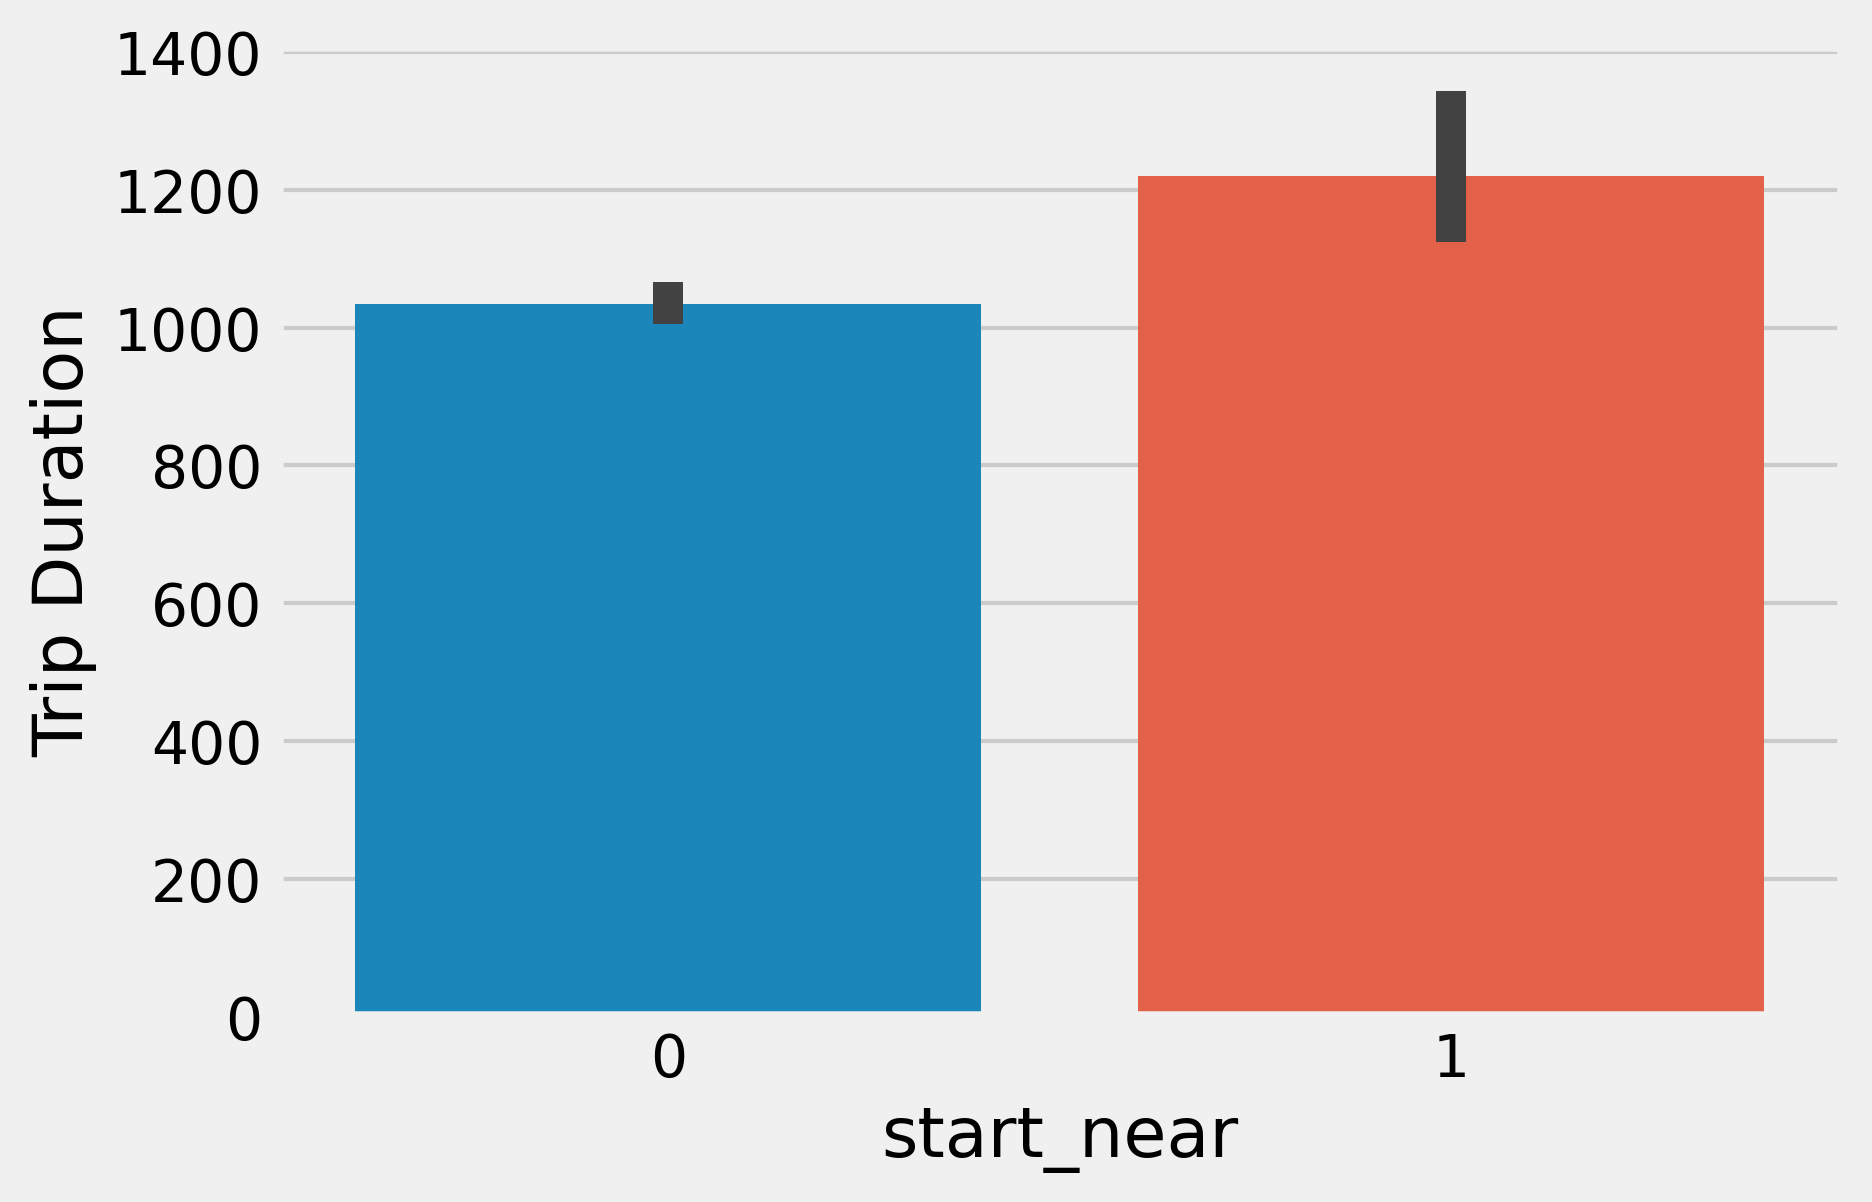

In [36]:
g = sns.barplot(x = 'start_near', y = 'Trip Duration',
                data = citi,
               )

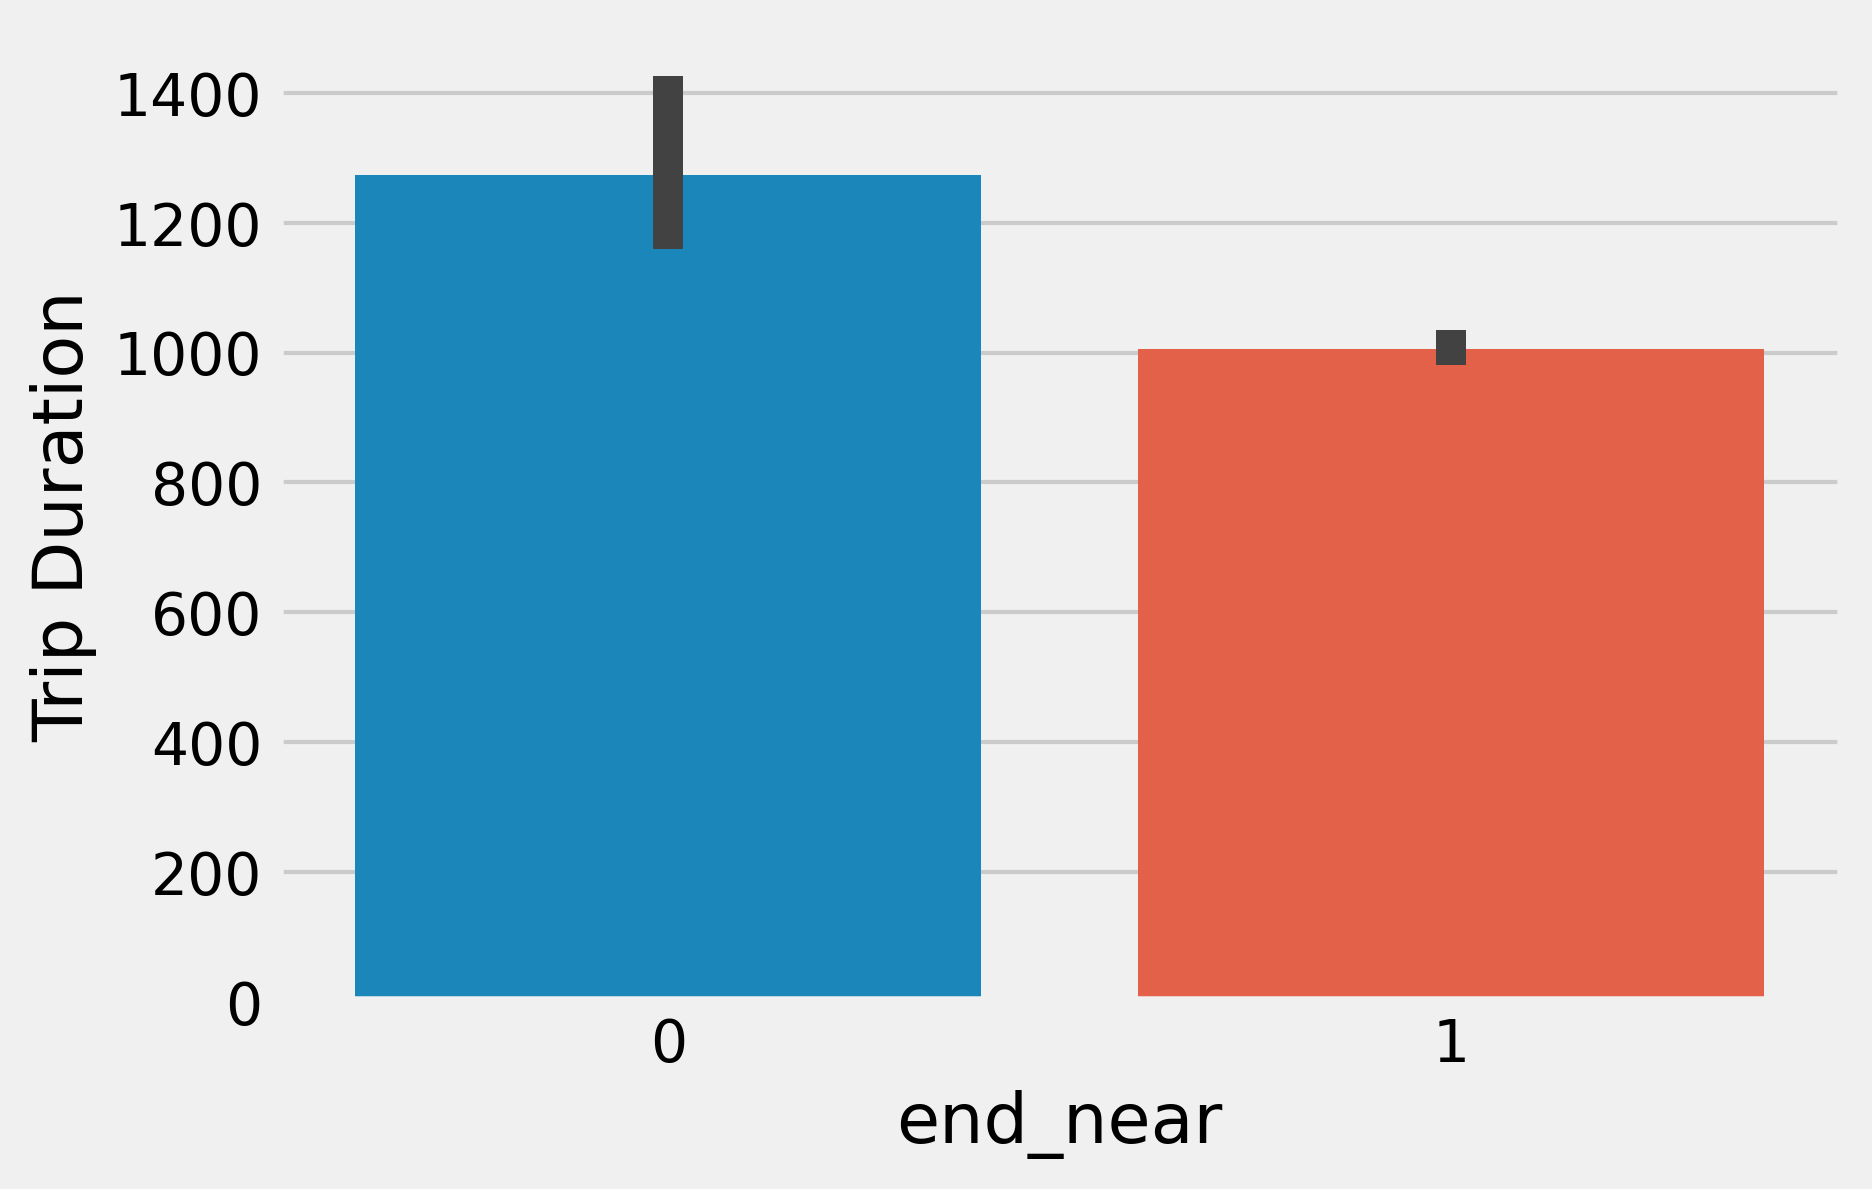

In [37]:
g = sns.barplot(x = 'end_near', y = 'Trip Duration',
                data = citi,
               )

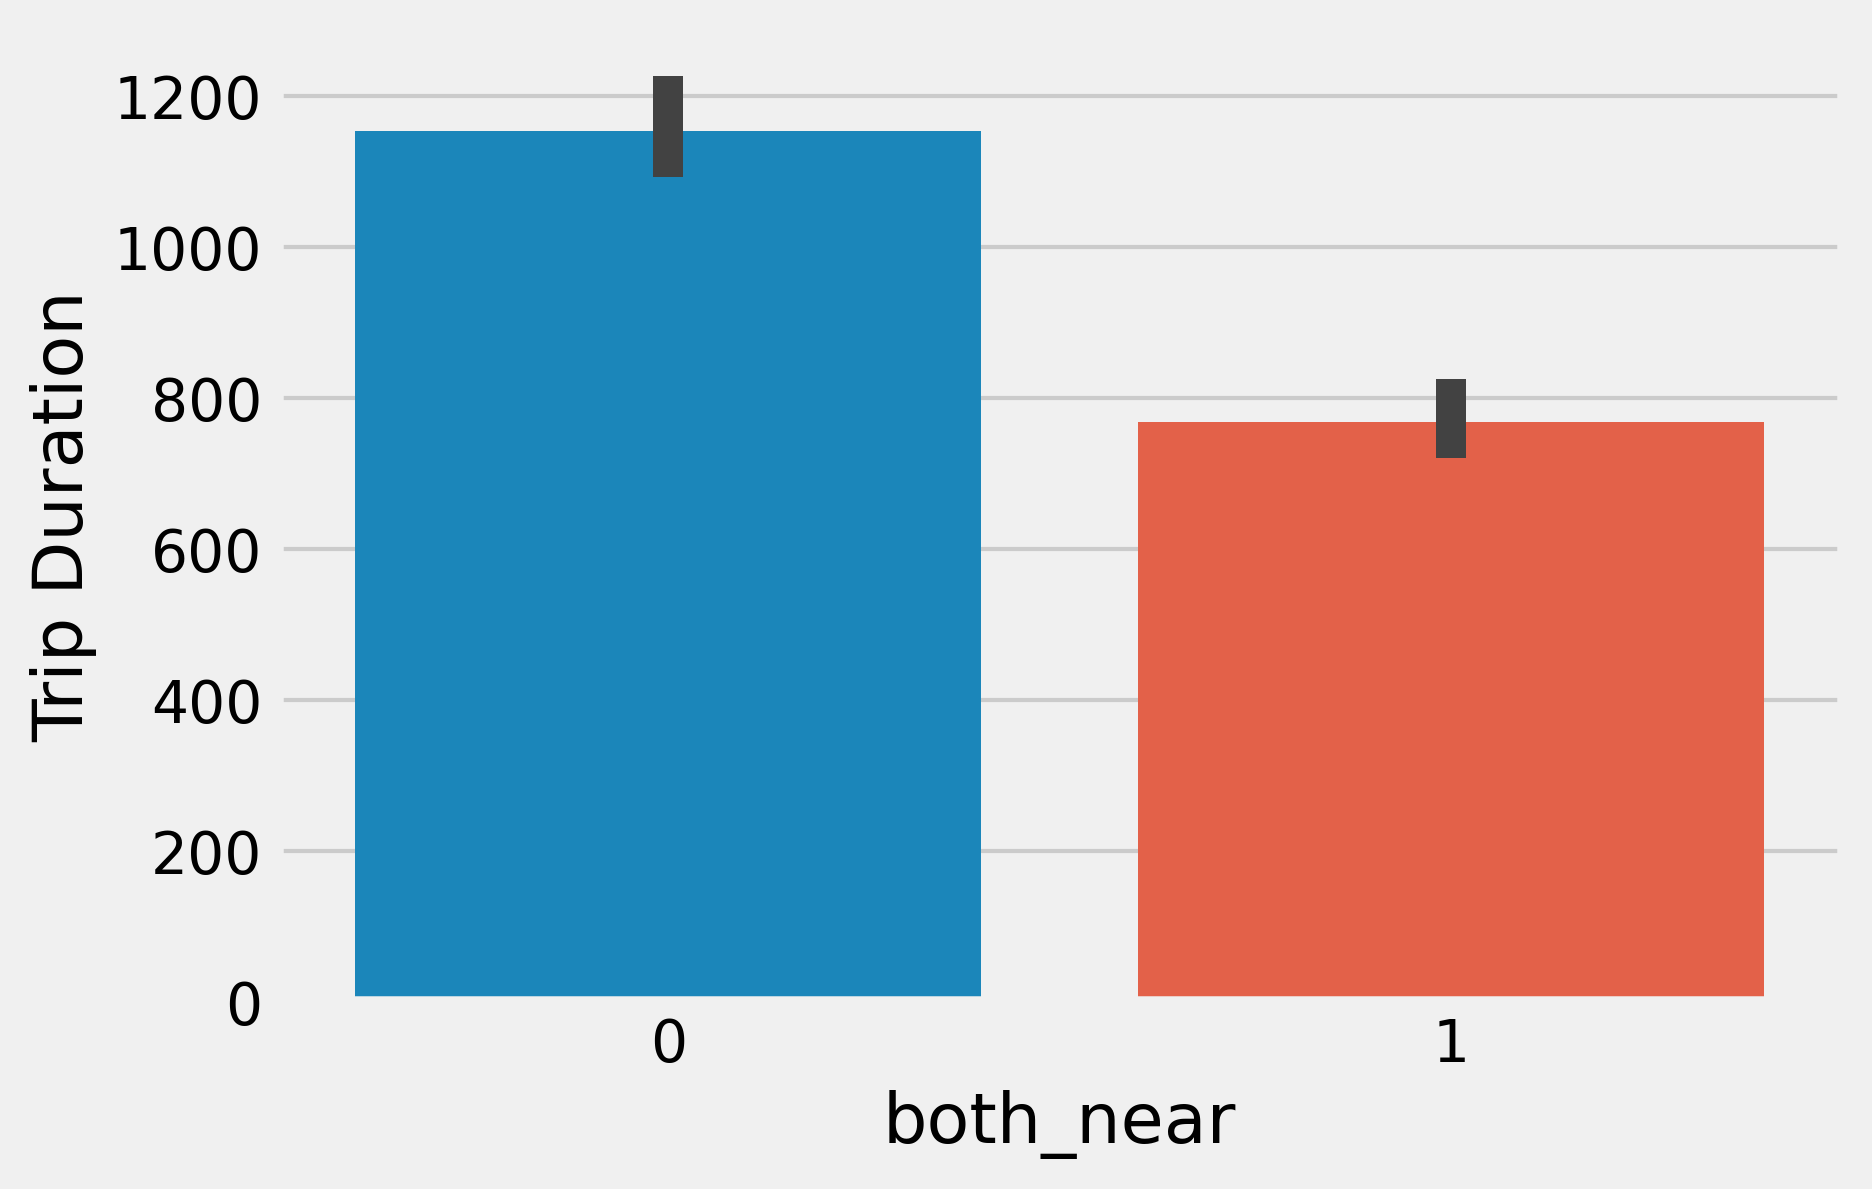

In [38]:
g = sns.barplot(x = 'both_near', y = 'Trip Duration',
                data = citi,
               )

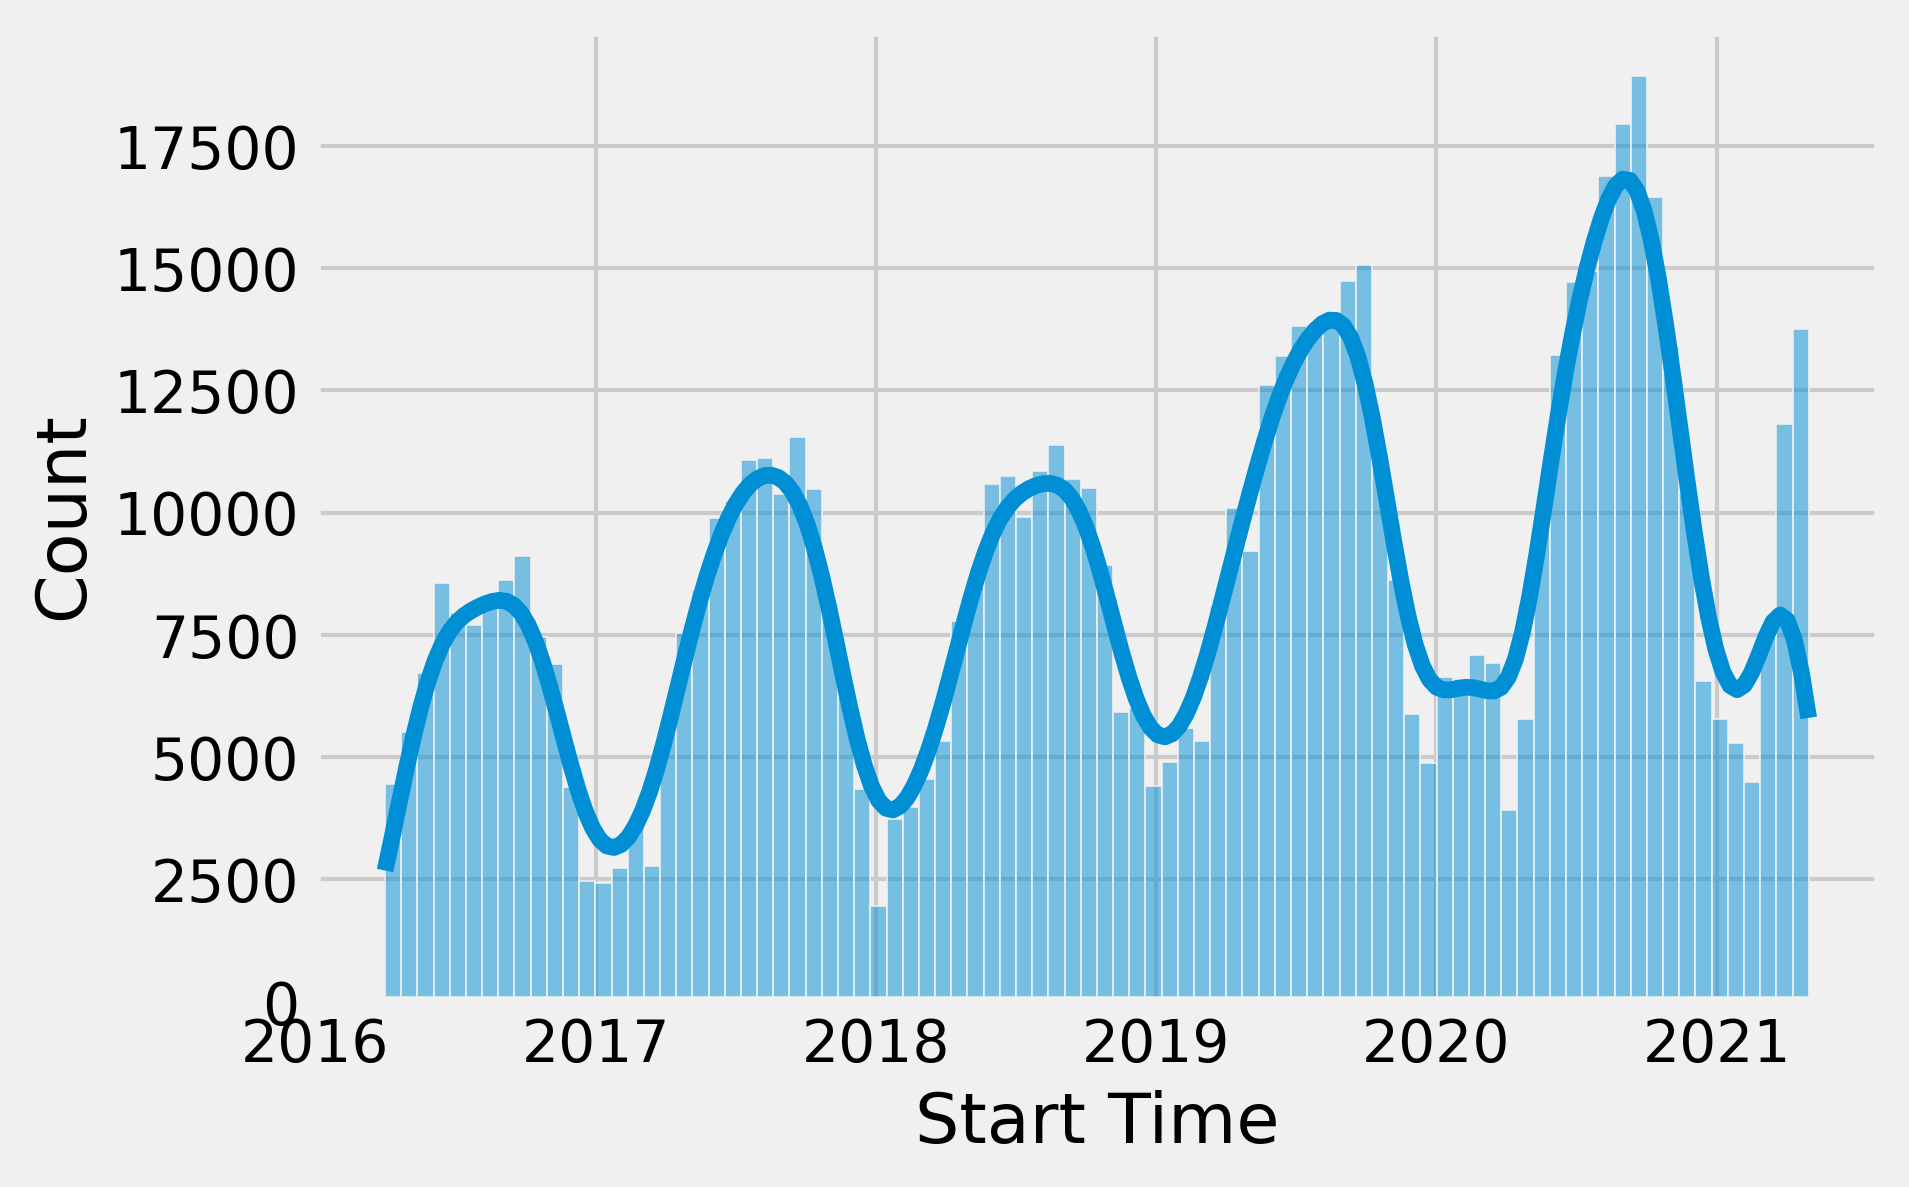

In [16]:
g = sns.histplot(data=citi, x="Start Time",kde=True)

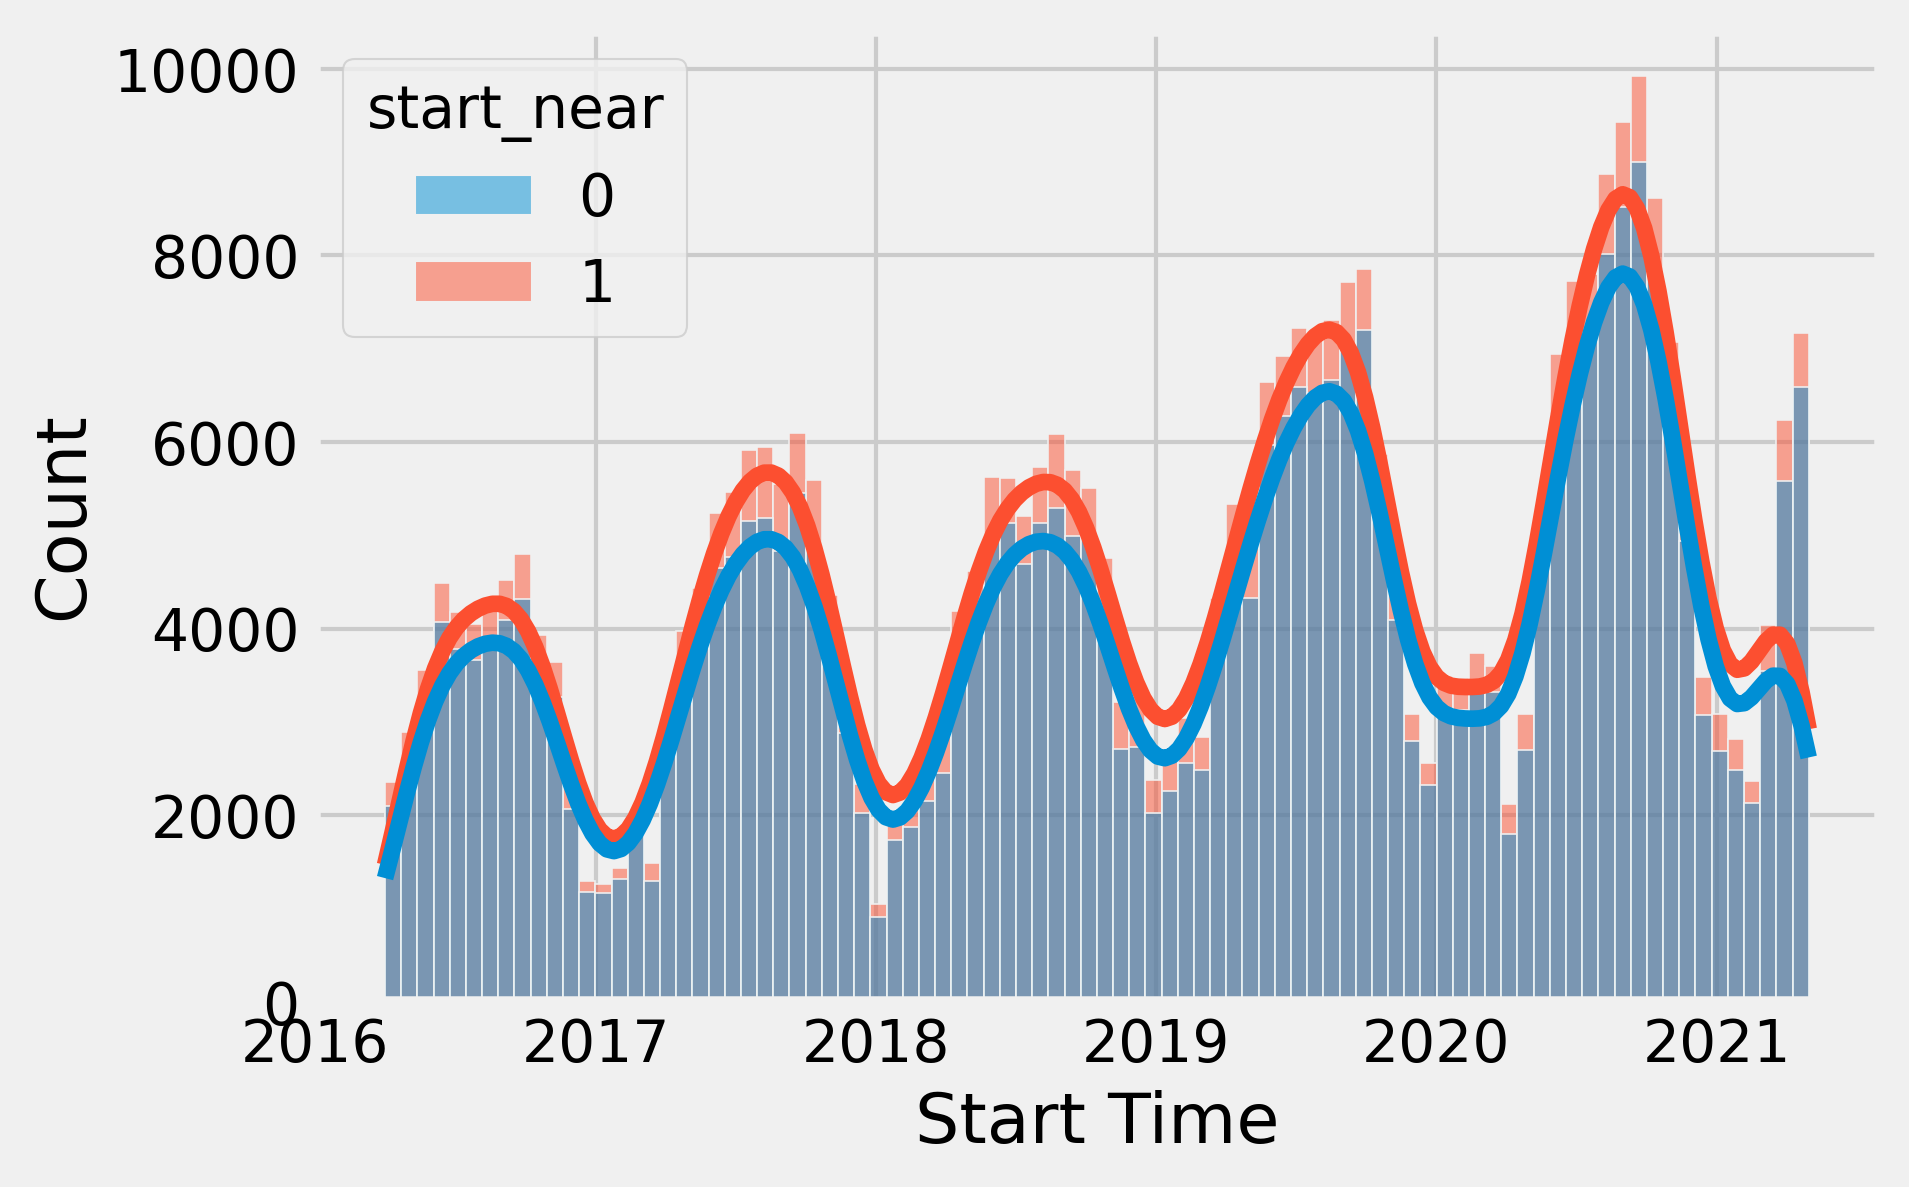

In [39]:
g = sns.histplot(data=citi, x="Start Time",
                 hue = 'start_near',
#                  multiple = 'stack',
                 kde=True)

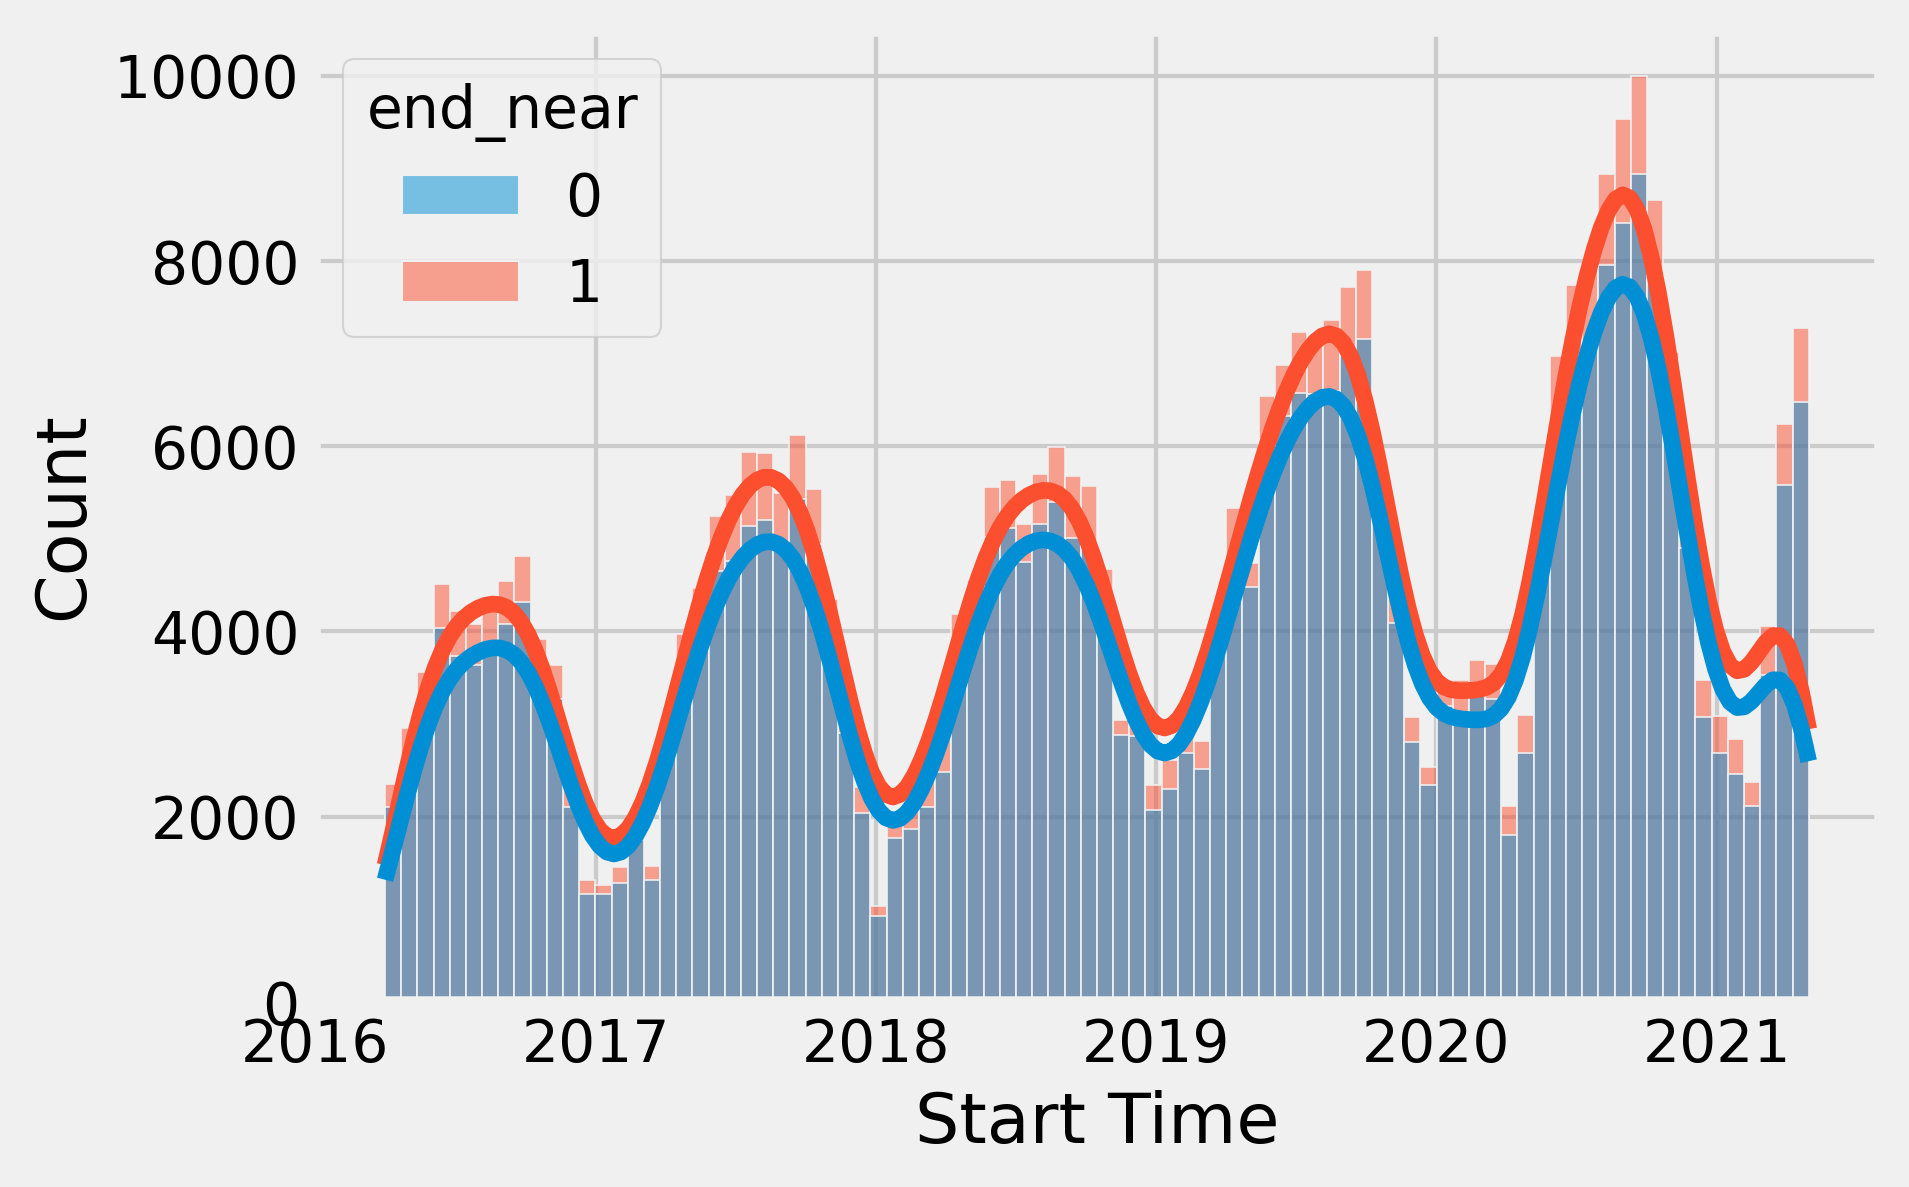

In [40]:
g = sns.histplot(data=citi, x="Start Time",
                 hue = 'end_near',
                 kde=True)

In [19]:
citi.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'start_near', 'end_near', 'both_near',
       'end_zipcode', 'start_zipcode'],
      dtype='object')

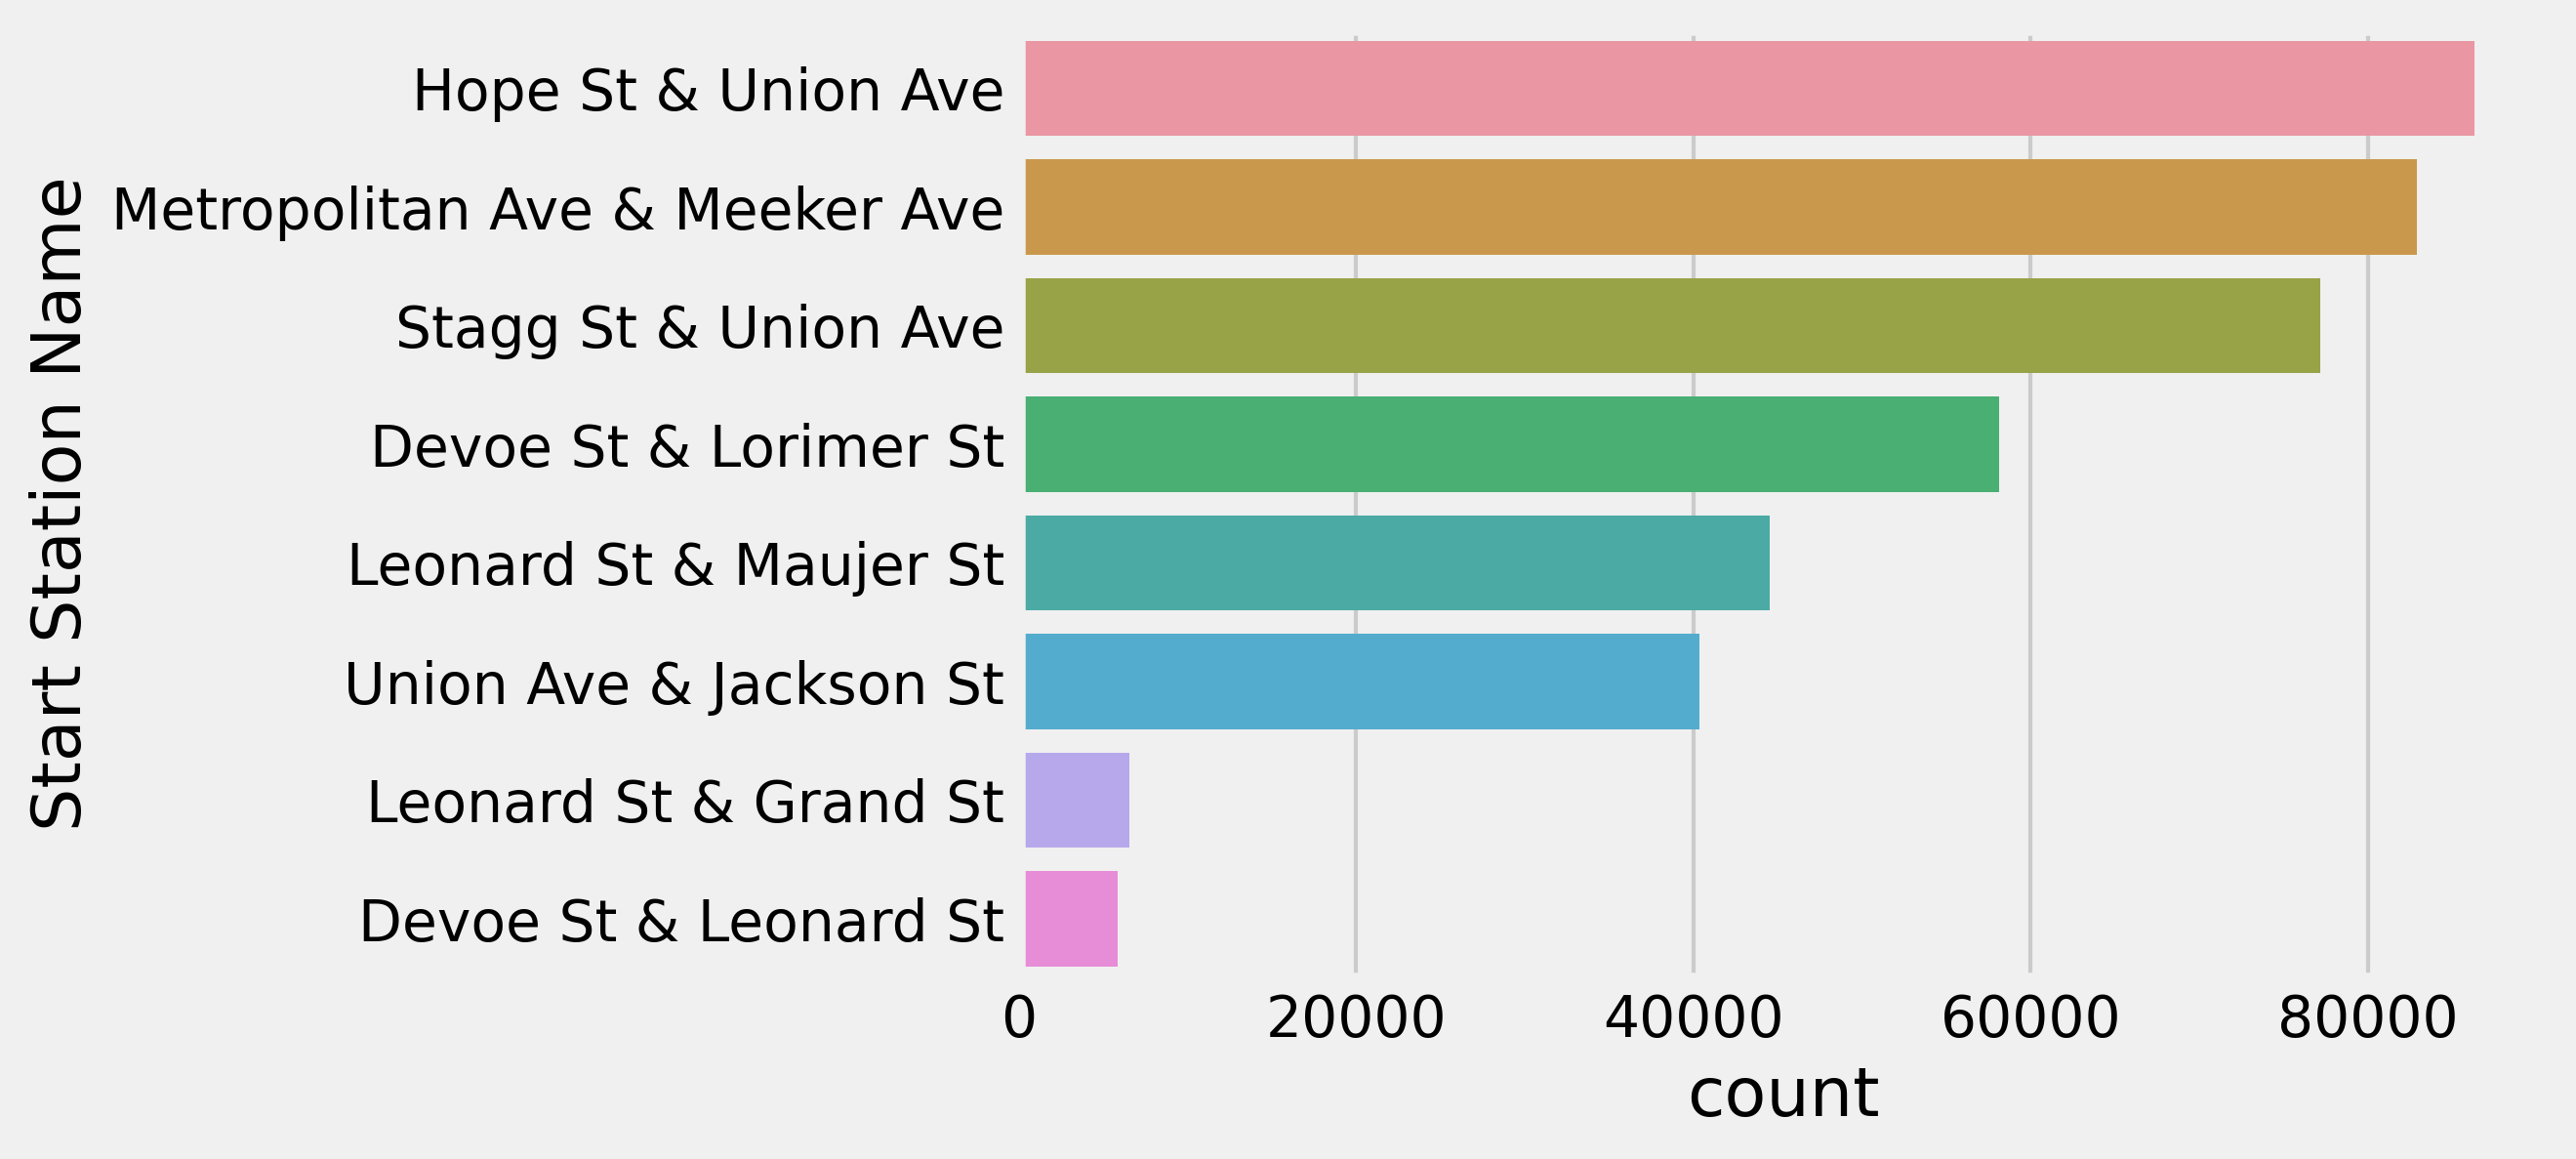

In [41]:
g = sns.countplot(y="Start Station Name", 
                  data=citi[citi['start_near']==1],
                  order = citi[citi['start_near']==1]['Start Station Name'].value_counts().index)


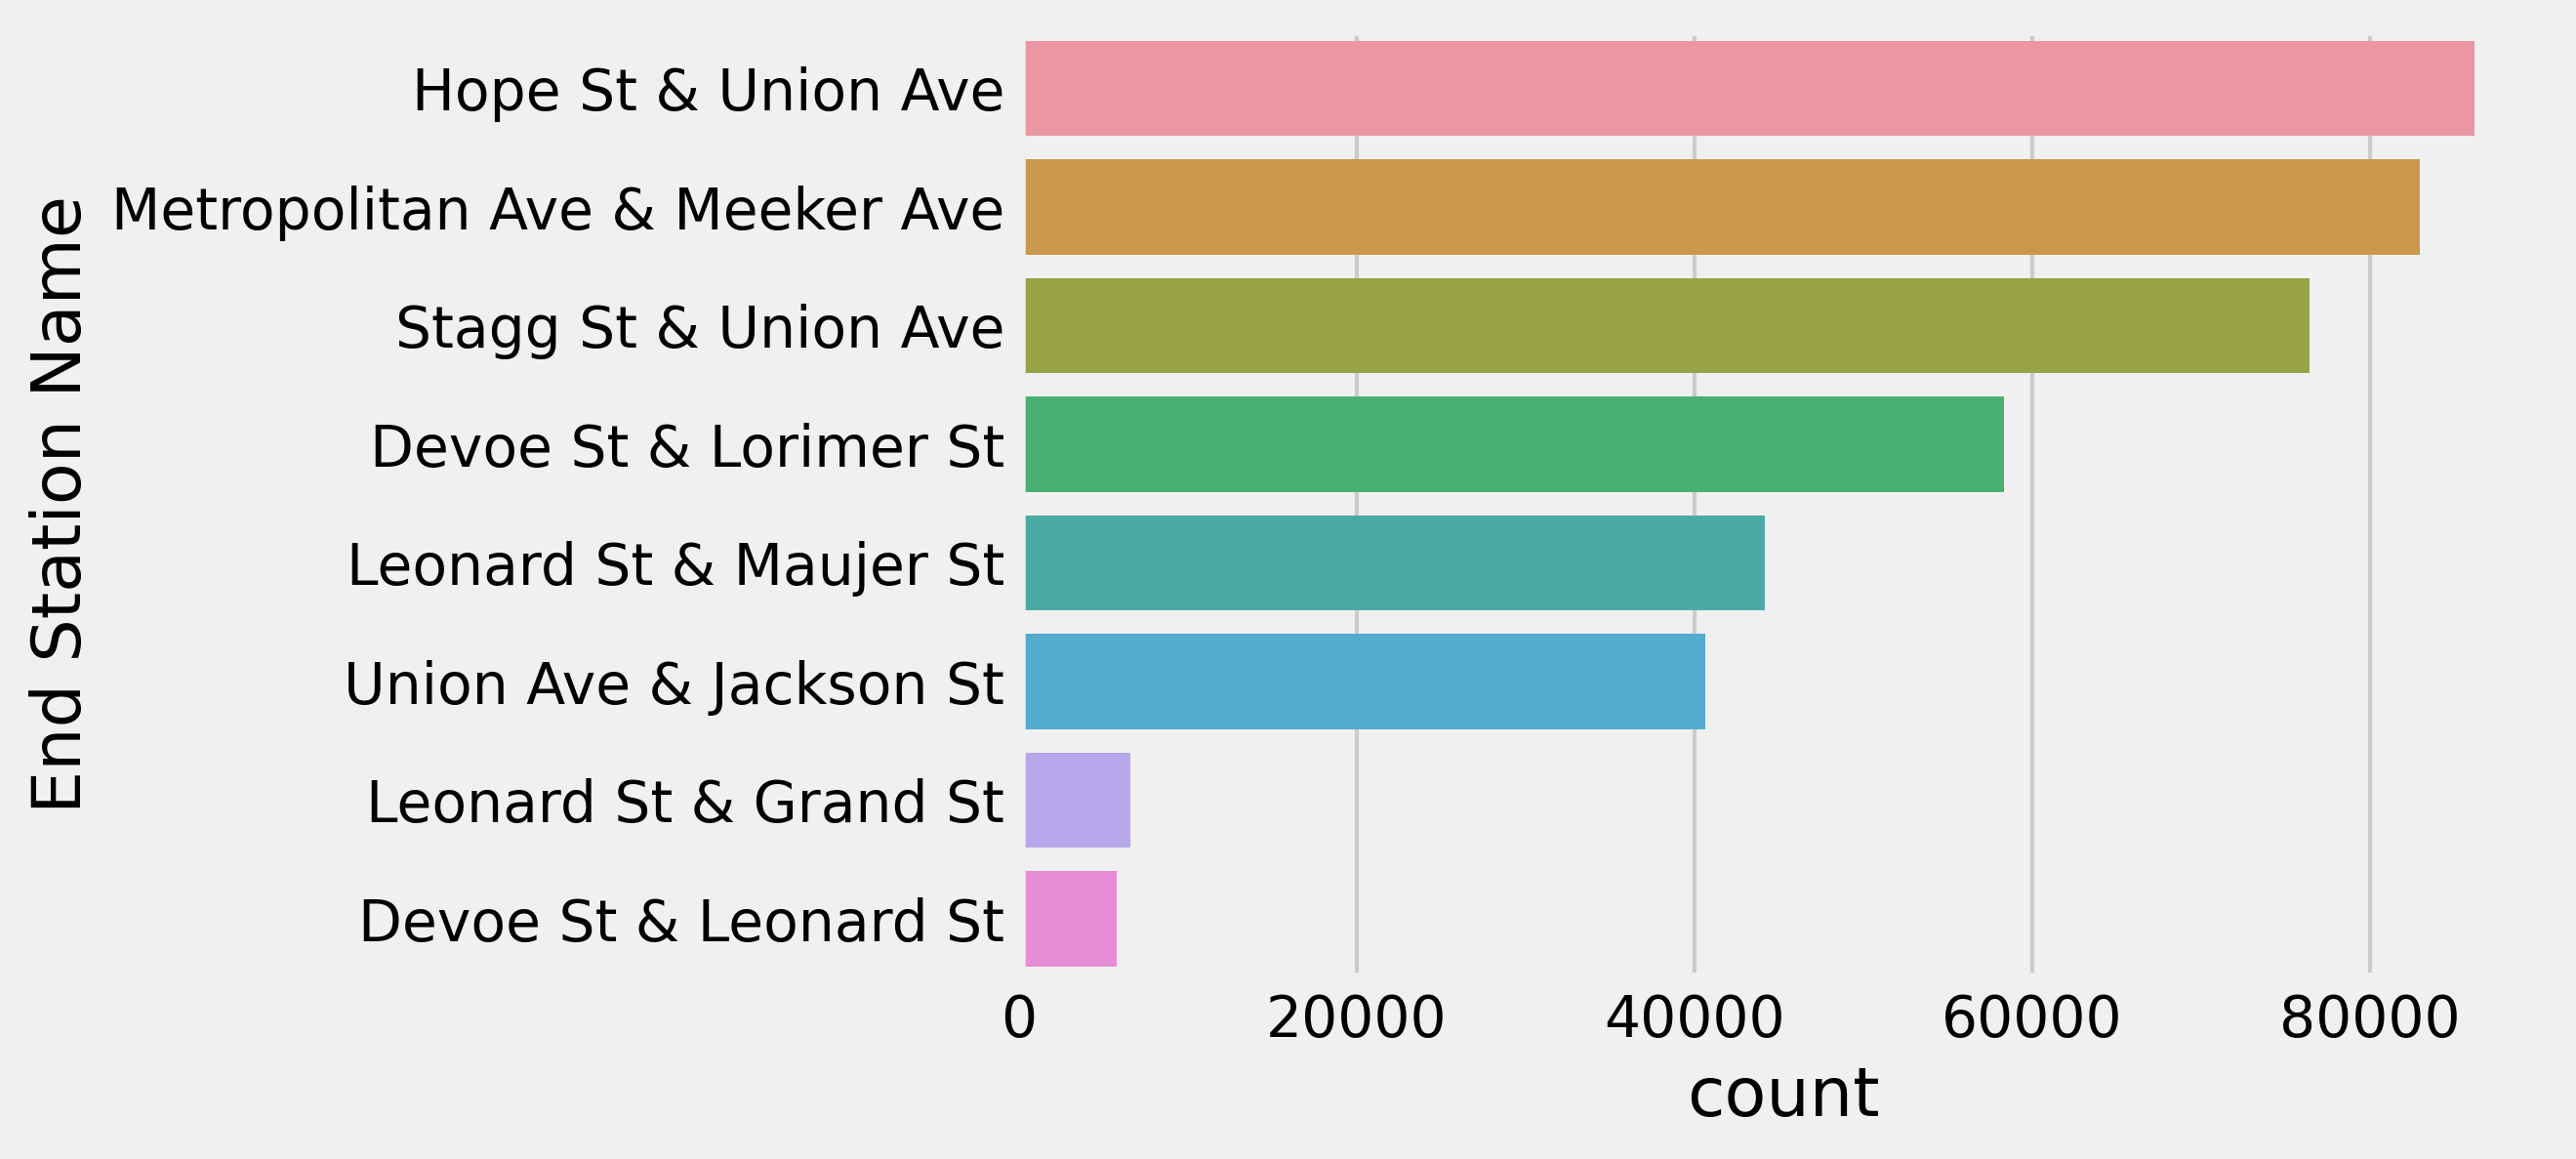

In [42]:
g = sns.countplot(y="End Station Name", 
                  data=citi[citi['end_near']==1],
                  order = citi[citi['end_near']==1]['End Station Name'].value_counts().index)


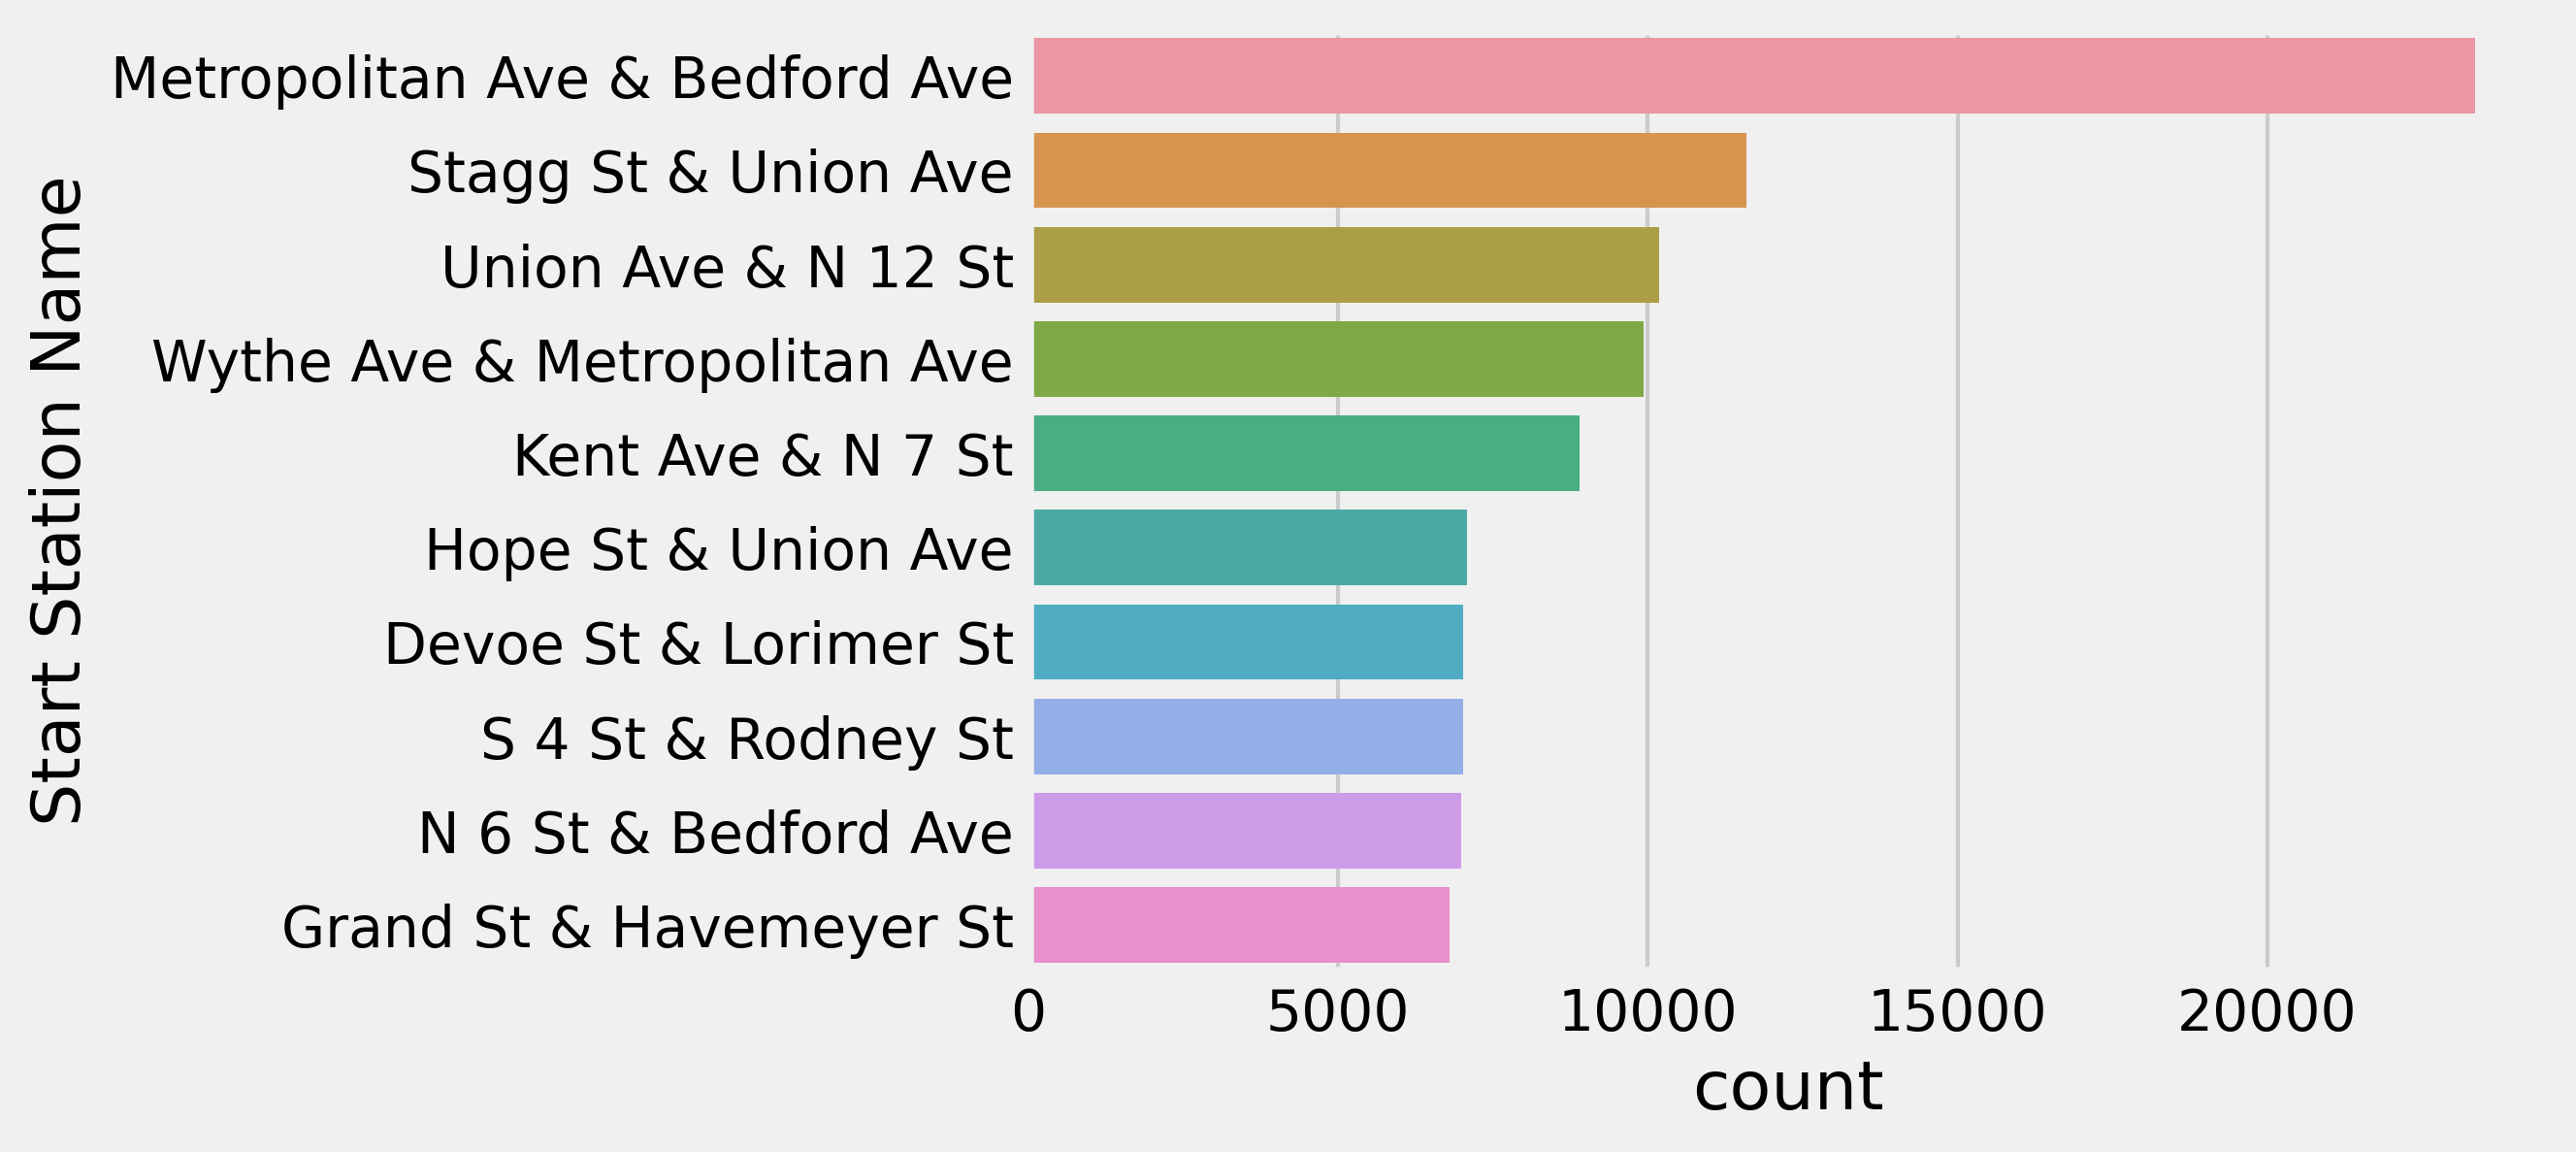

In [43]:
g = sns.countplot(y="Start Station Name", 
                  data=citi[citi['end_near']==1],
                  order = citi[citi['end_near']==1]['Start Station Name'].value_counts().iloc[:10].index)



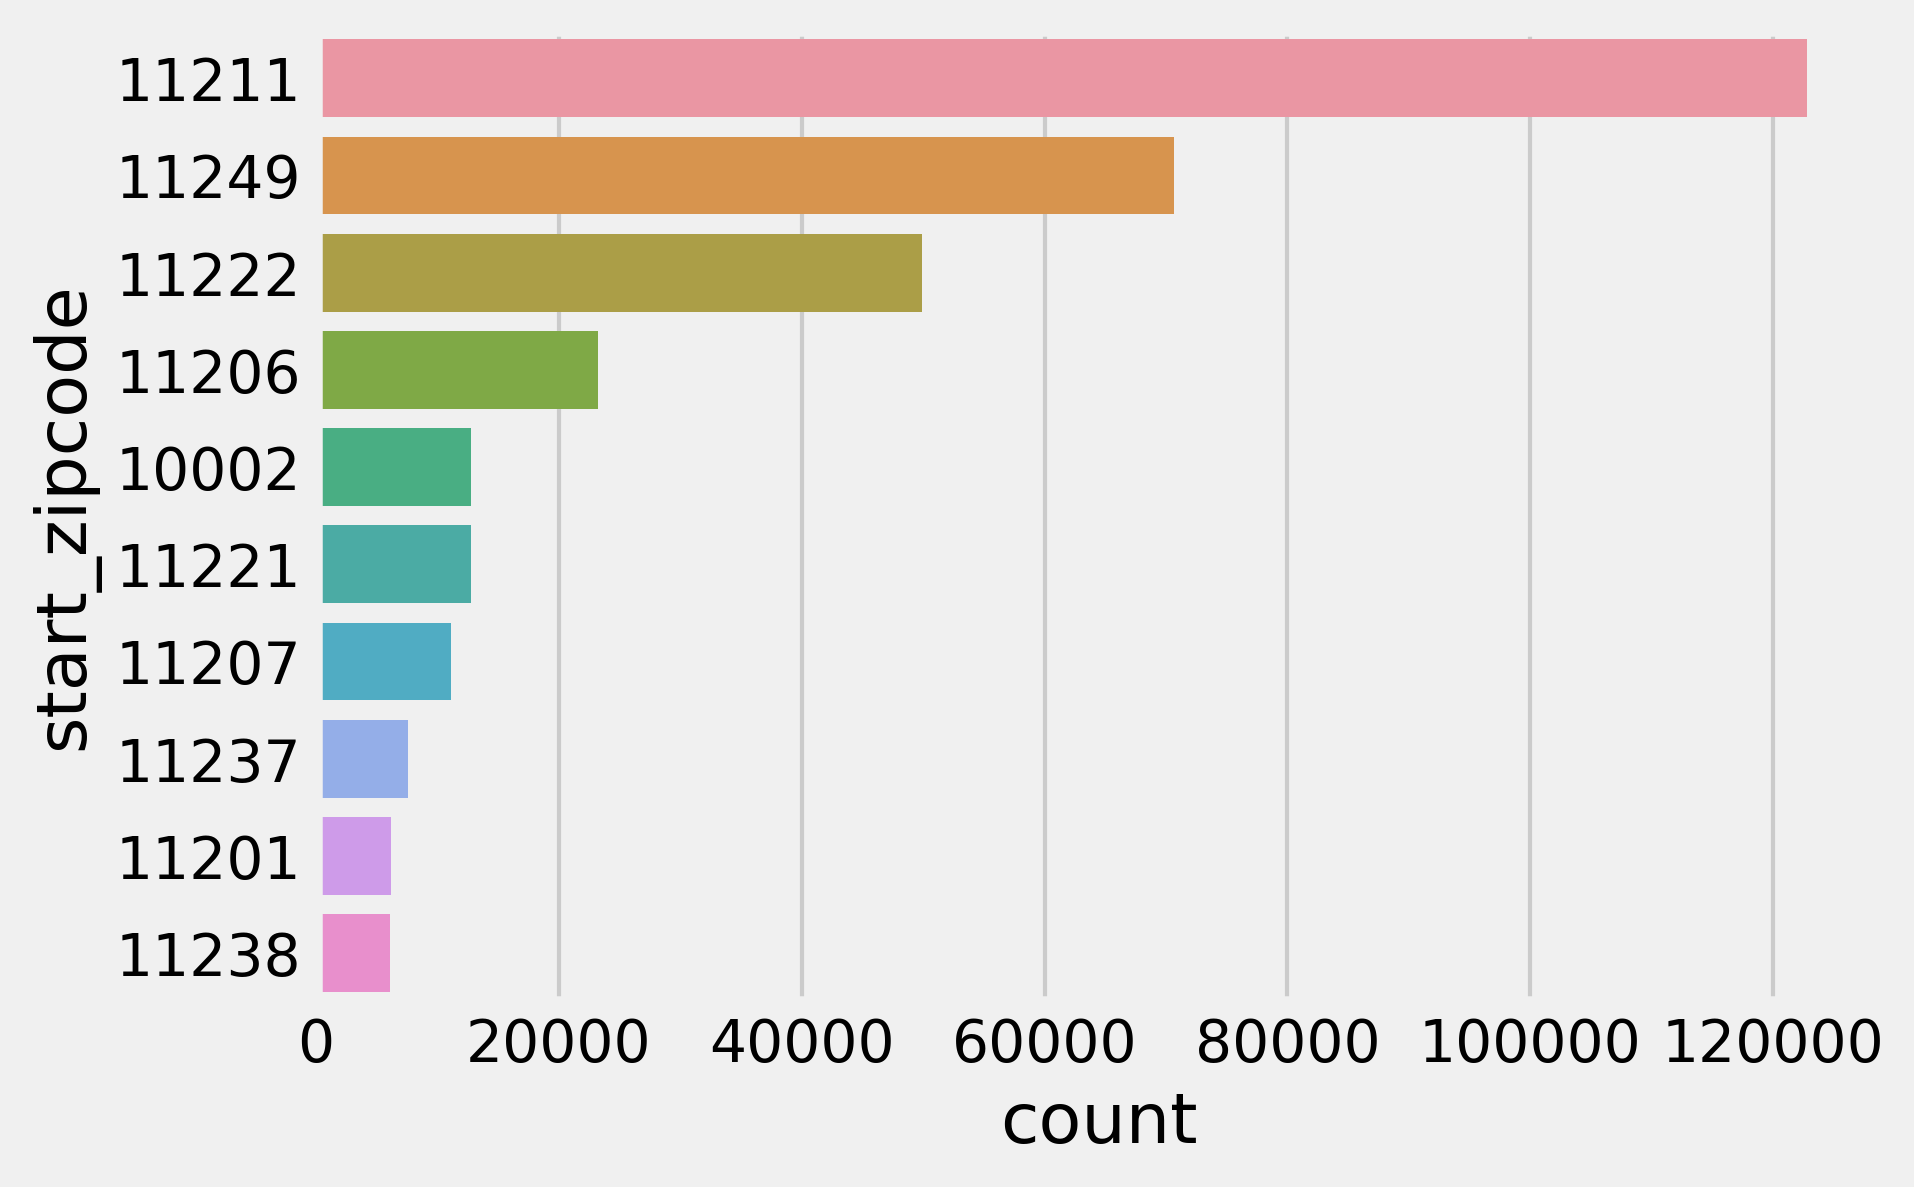

In [44]:
g = sns.countplot(y="start_zipcode", 
                  data=citi[citi['end_near']==1],
                  order = citi[citi['end_near']==1]['start_zipcode'].value_counts().iloc[:10].index)




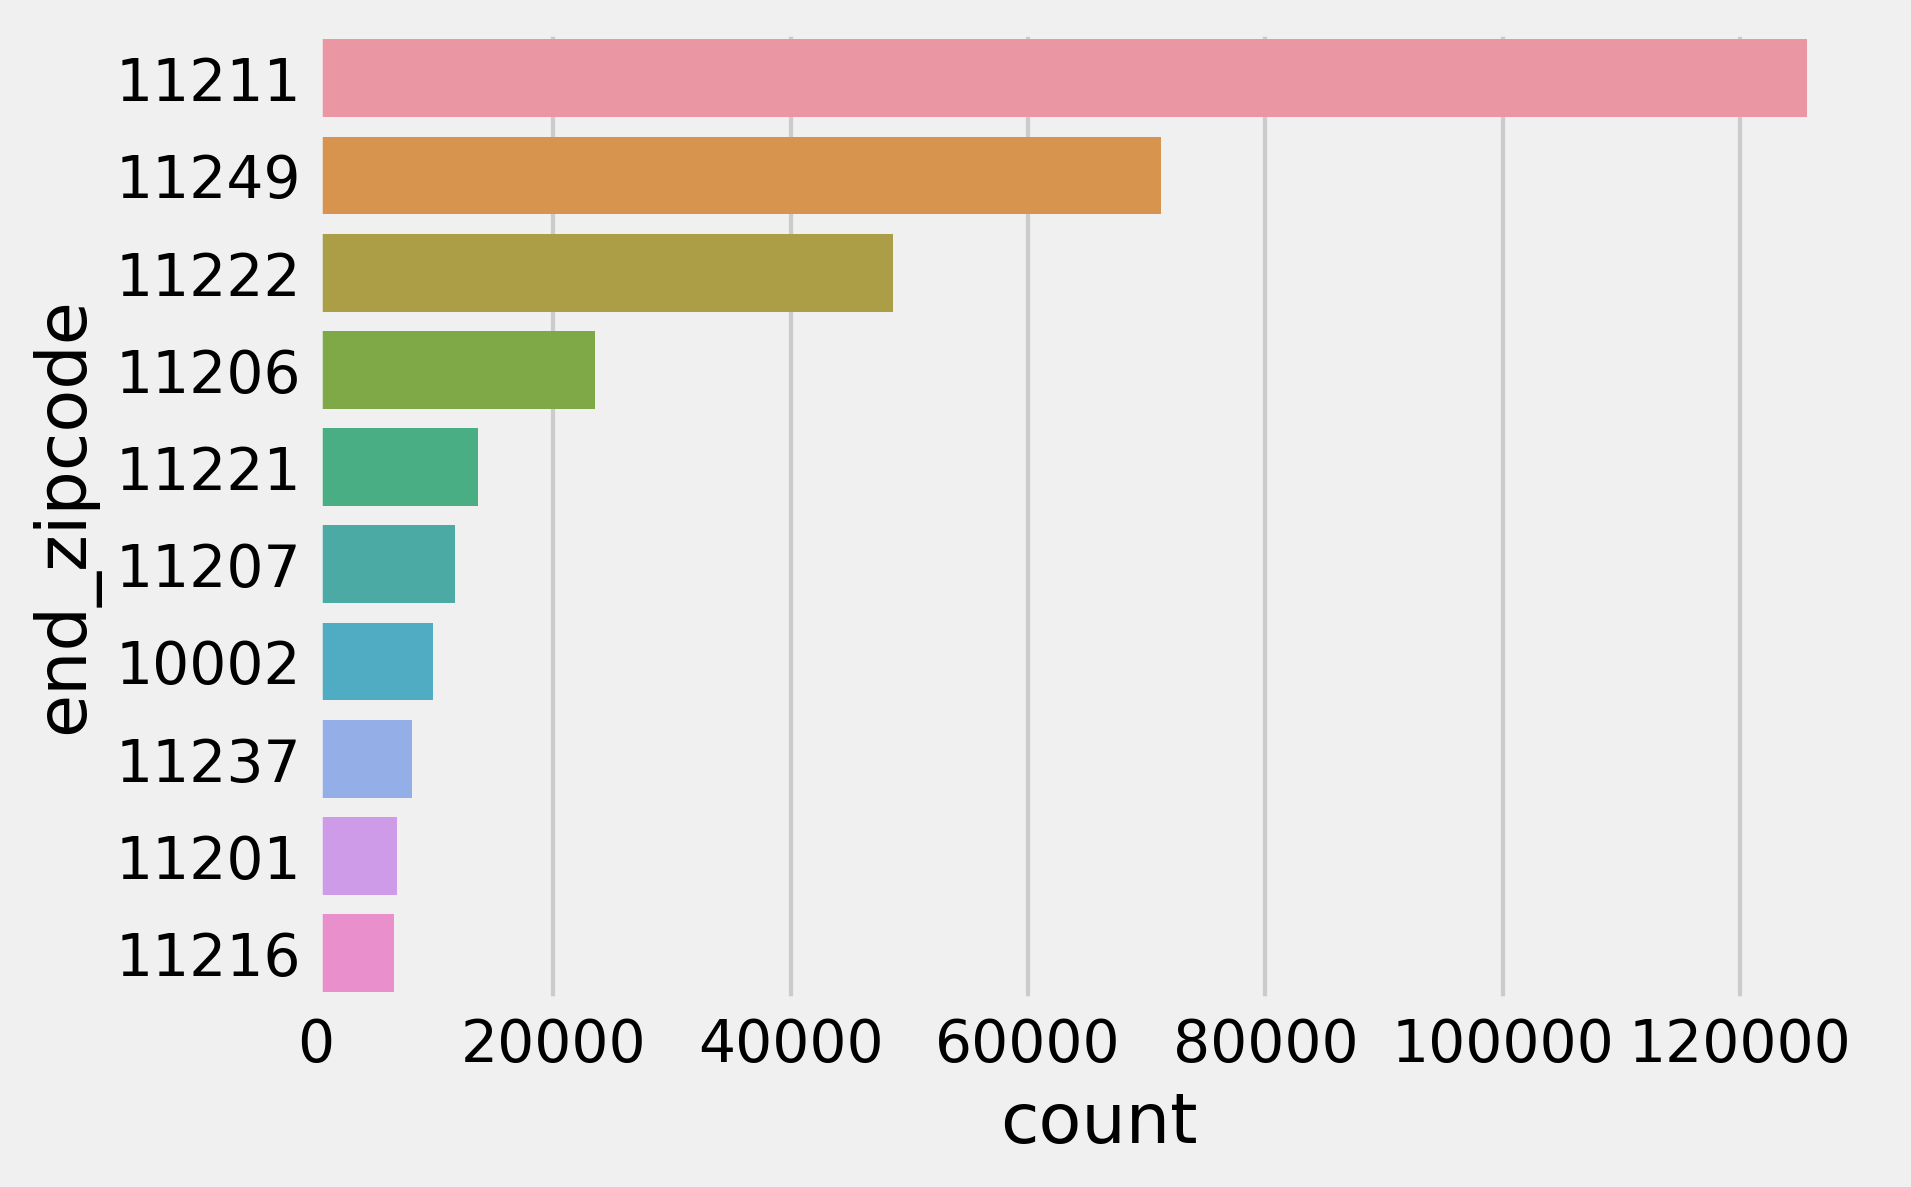

In [45]:
g = sns.countplot(y="end_zipcode", 
                  data=citi[citi['start_near']==1],
                  order = citi[citi['start_near']==1]['end_zipcode'].value_counts().iloc[:10].index)

In [46]:
citi['YearMonth'] = pd.to_datetime(citi['Start Time']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

citi_start_near = citi[citi['start_near']==1]
citi_end_near = citi[citi['end_near']==1]


In [30]:
citi.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'start_near', 'end_near', 'both_near',
       'end_zipcode', 'start_zipcode', 'YearMonth'],
      dtype='object')

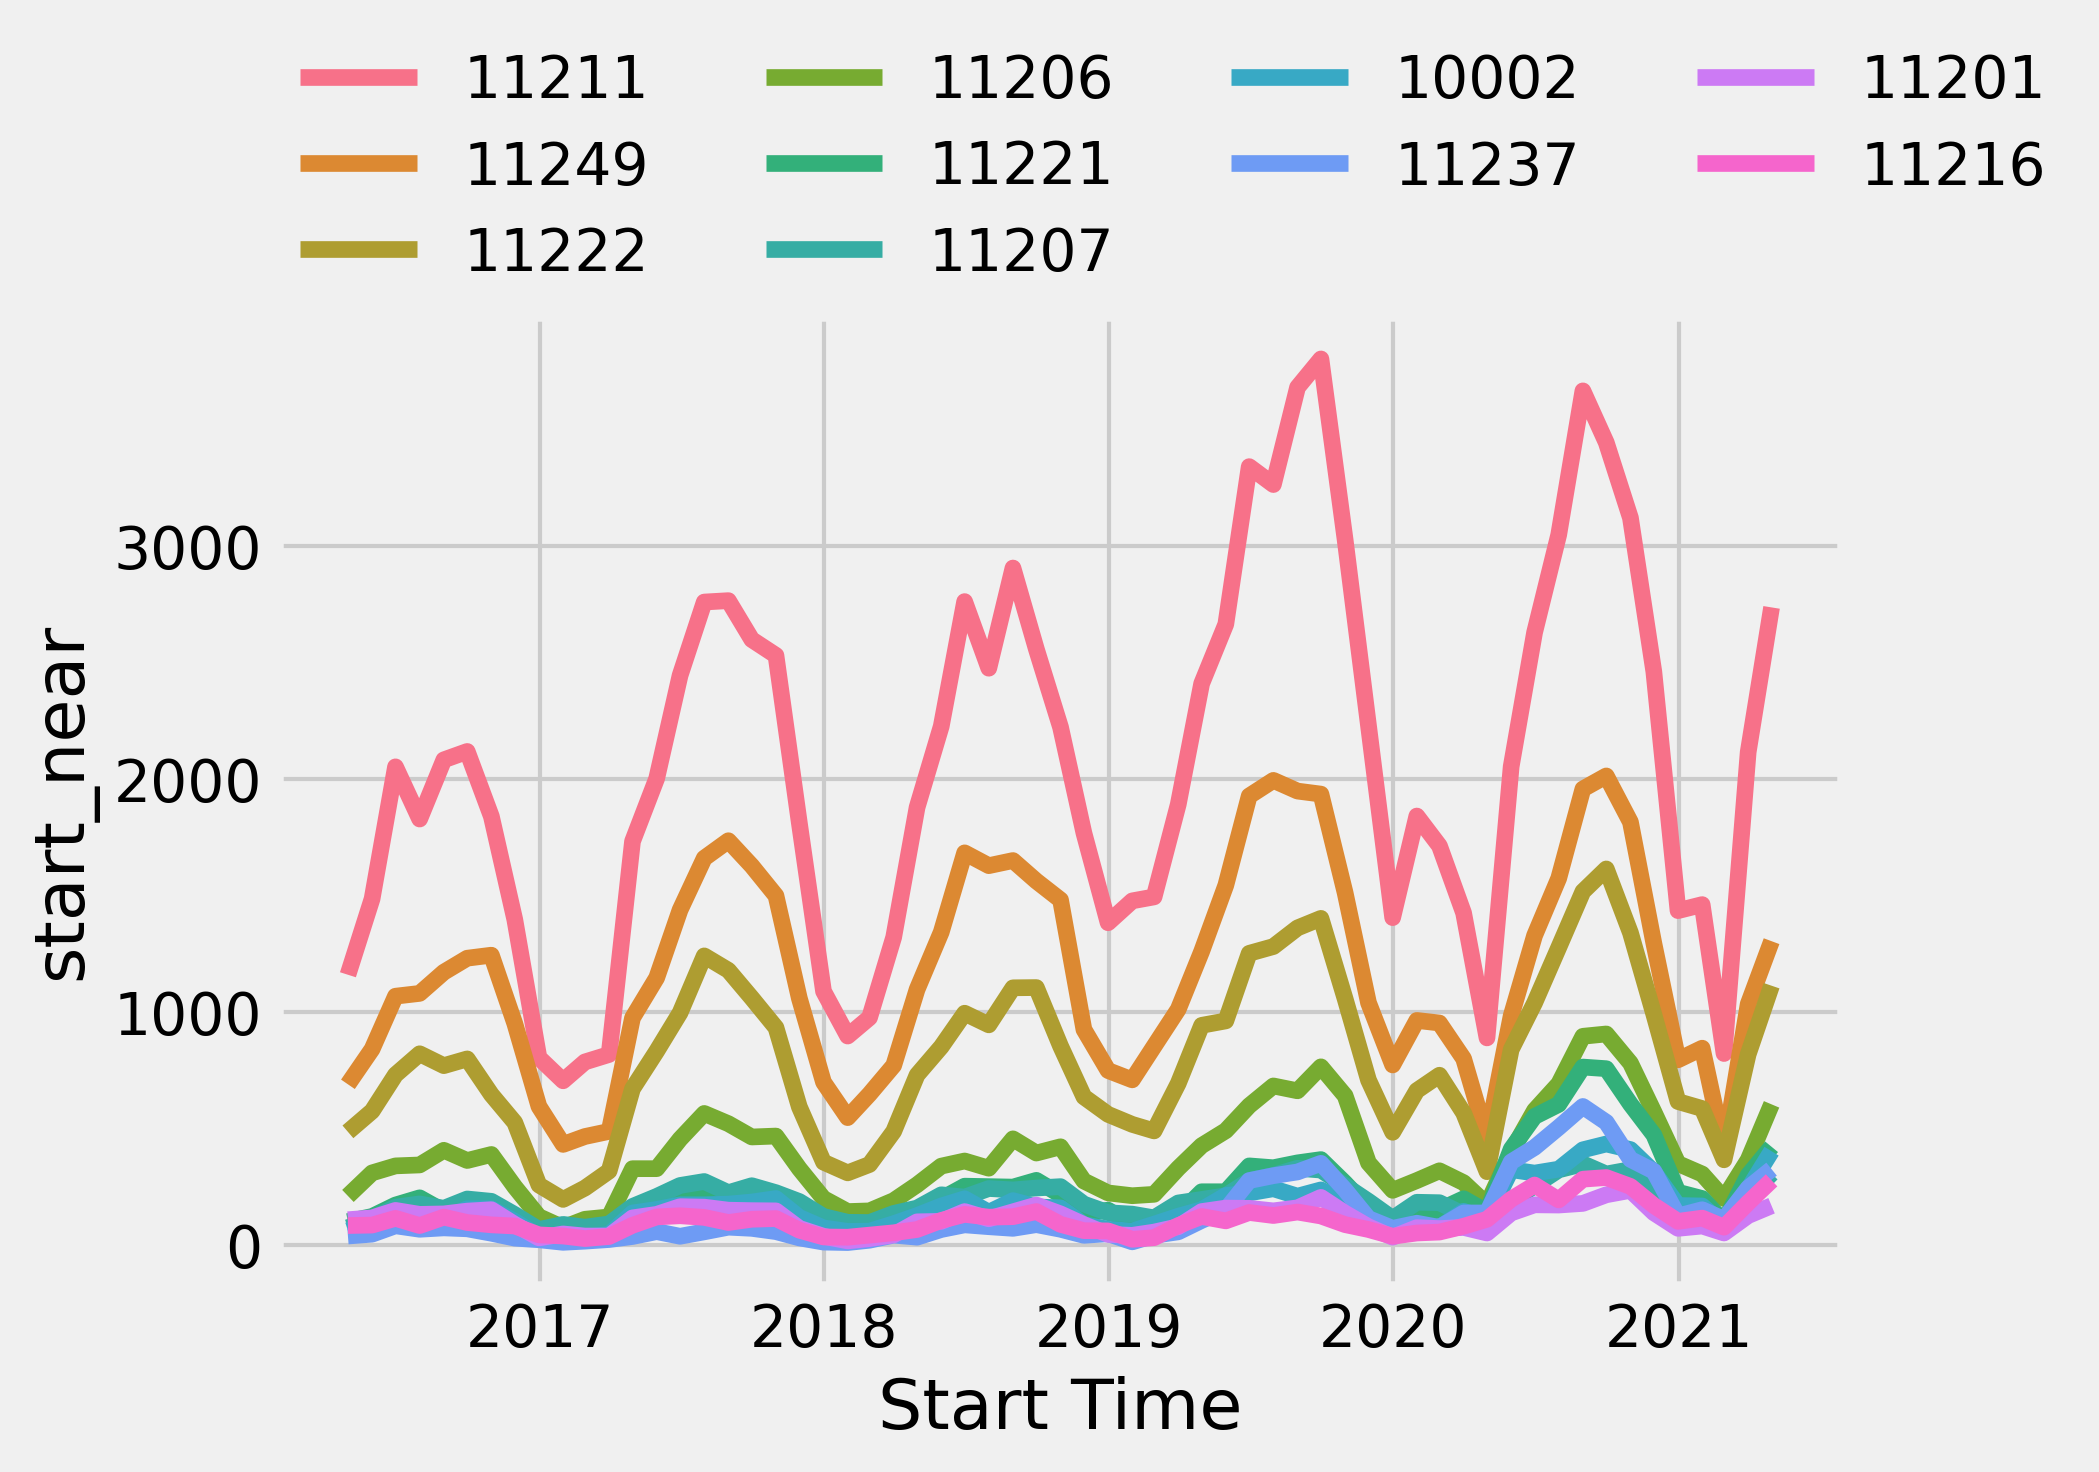

In [47]:
end_zipcode_10 = list(citi[citi['start_near']==1]['end_zipcode'].value_counts().iloc[:10].index)

data_all = []
for zipcode in end_zipcode_10:
    data = pd.DataFrame(citi_start_near[citi_start_near['end_zipcode']==zipcode].resample(rule='M', on='Start Time')['start_near'].sum())
    data['zipcode'] = zipcode
    data_all.append(data)

df = pd.concat(data_all, axis=0)

fig, ax = plt.subplots()
g = sns.lineplot(data=df, x="Start Time", y="start_near",hue='zipcode',ax=ax)

ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=4,
            borderaxespad=0, frameon=False)

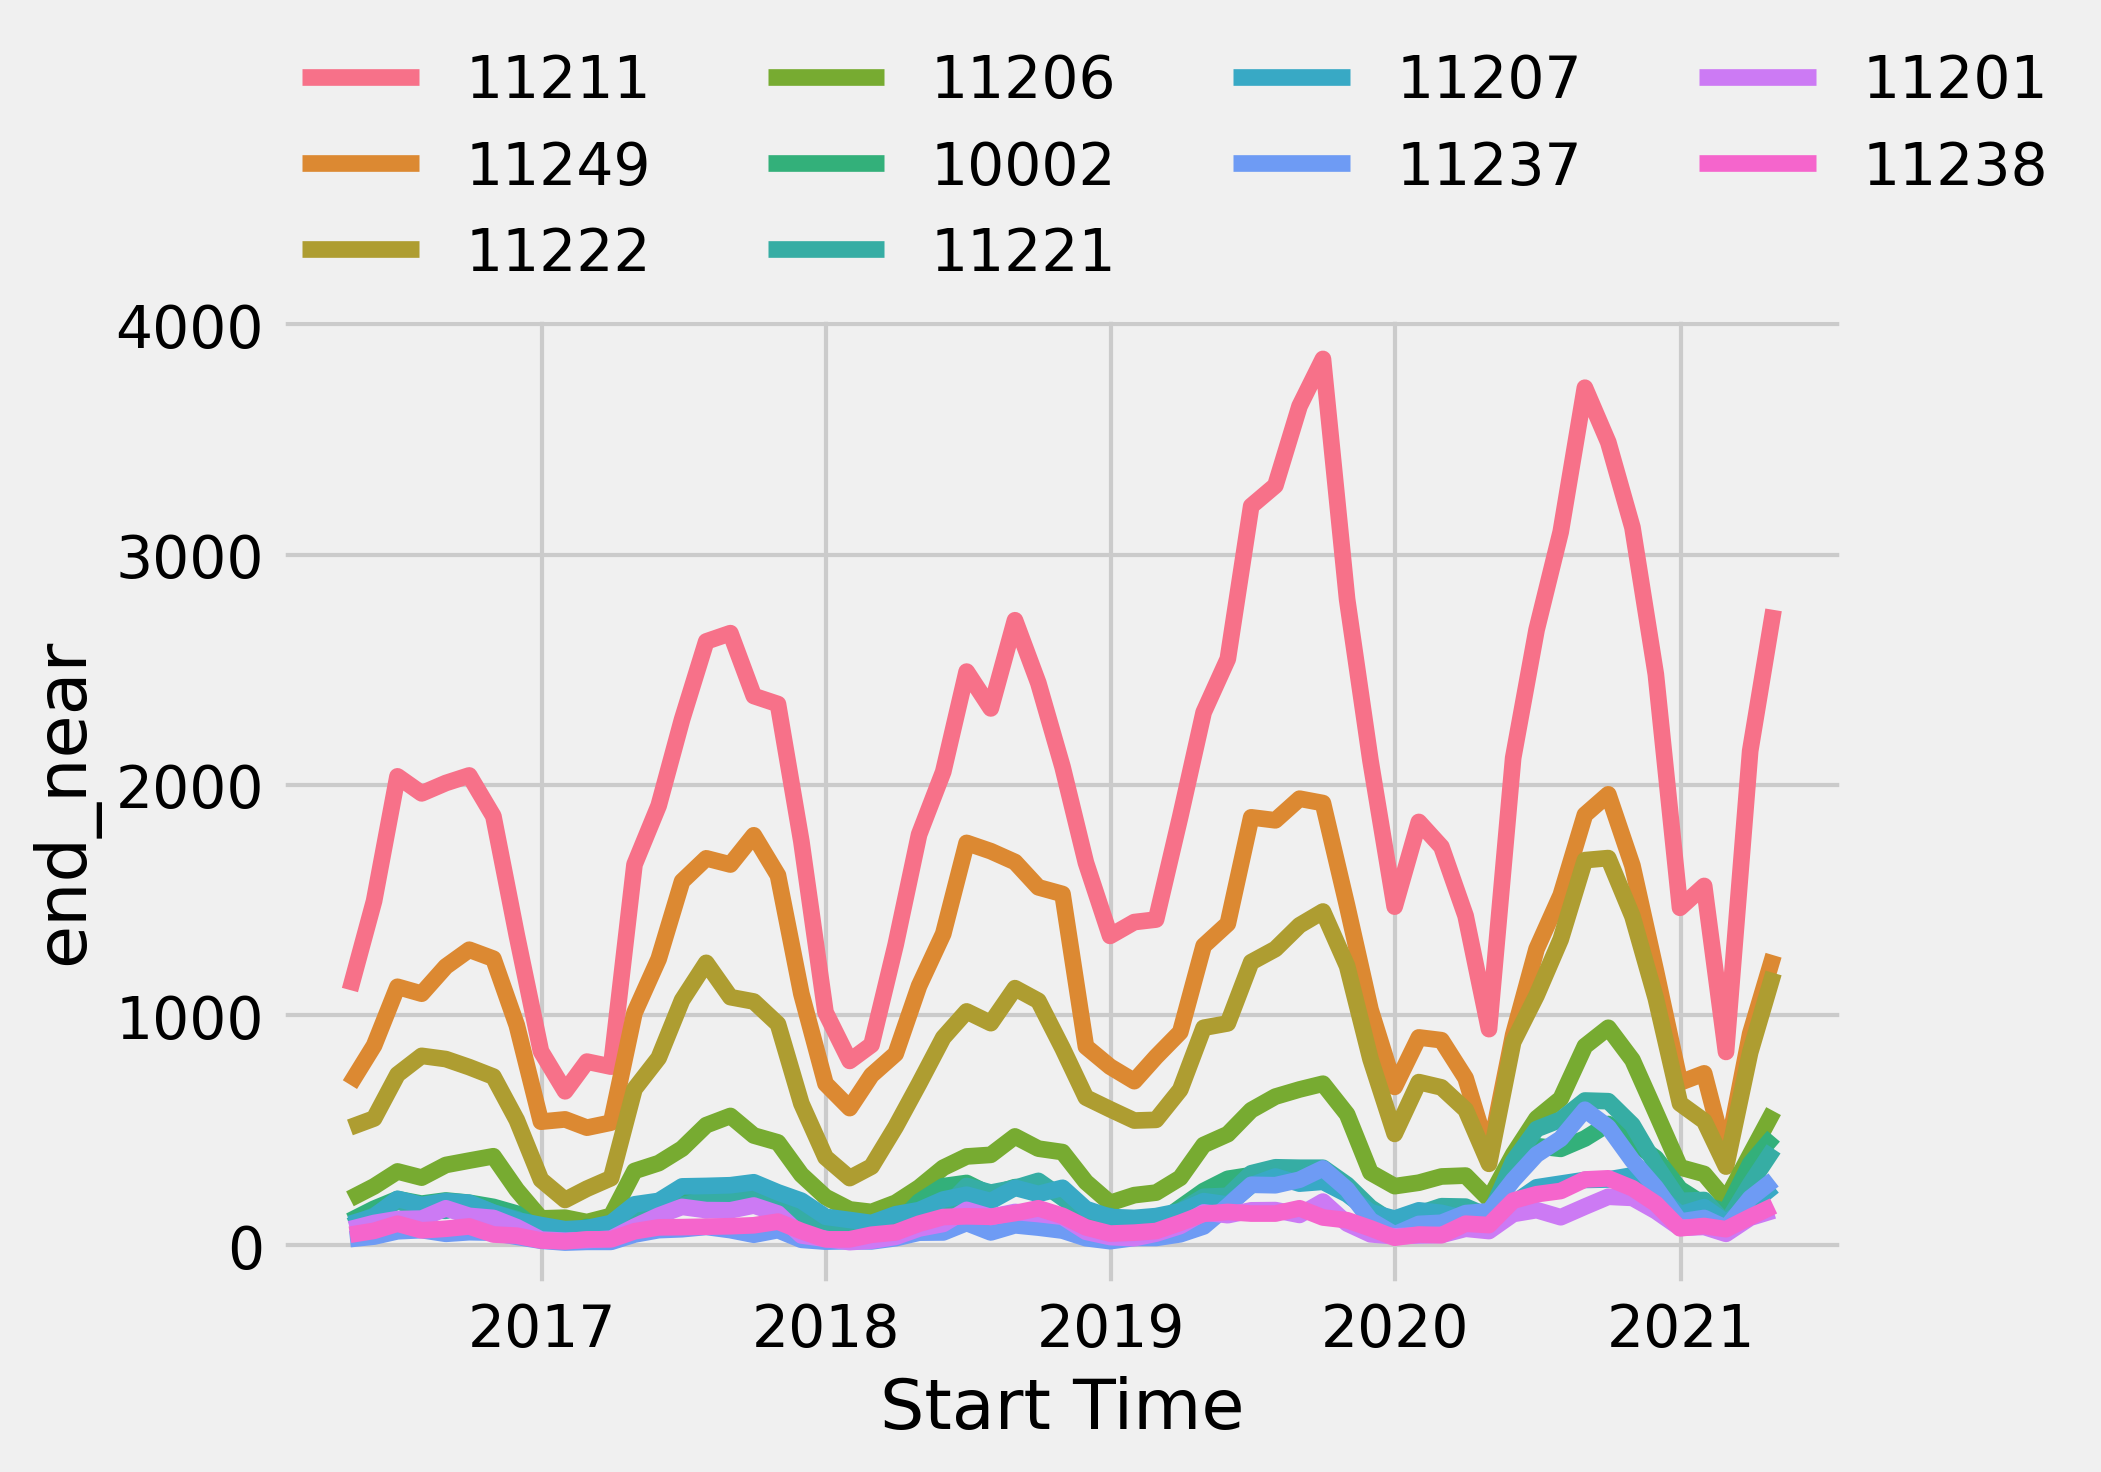

In [48]:
citi_end_near
start_zipcode_10 = list(citi[citi['end_near']==1]['start_zipcode'].value_counts().iloc[:10].index)
data_all = []
for zipcode in start_zipcode_10:
    data = pd.DataFrame(citi_end_near[citi_end_near['start_zipcode']==zipcode].resample(rule='M', on='Start Time')['end_near'].sum())
    data['zipcode'] = zipcode
    data_all.append(data)

df = pd.concat(data_all, axis=0)

fig, ax = plt.subplots()
g = sns.lineplot(data=df, x="Start Time", y="end_near",hue='zipcode',ax=ax)

ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=4,
            borderaxespad=0, frameon=False)

In [ ]:
df.columns

In [ ]:
data = citi_start_near[citi_start_near['end_zipcode']==zipcode].resample(rule='M', on='Start Time')['start_near'].sum()



In [ ]:
citi['Trip Duration'].mean()

In [ ]:
citi[citi['start_near']==1]['Trip Duration'].mean()

In [ ]:
citi[citi['end_near']==1]['Trip Duration'].mean()

In [ ]:
citi[citi['both_near']==1]['Trip Duration'].mean()

In [ ]:
citi[citi['Start Station ID']==citi['End Station ID']]['Trip Duration'].mean()

In [ ]:
citi.head()